### Assignment
#### 771766 - Fundamentals of Data Science
##### Census Data Project
##### Sulaiman Adeleye Shina
##### Student Number: 202236581

### Tasks
### This assignment is worth 70% of the total marks for this module)

### Information About Our Mock Dataset
**_The mock census you will be given contains randomly generated data using the Faker package in Python. It has been generated in a similar manner to (and designed to directly emulate the format of) the 1881 census of the UK wherein only a few questions were asked of the population. The fields recorded are as follows:_**
1. Street Number (this is set to “1” if it is a unique dwelling);
2. Street Name;
3. First Name of occupant;
4. Surname of occupant;
5. Age of occupant;
6. Relationship to the “Head” of the household (anyone aged over 18 can be a “Head” – they are simply the person who had the responsibility to fill in the census details);
7. Marital status (one of: Single, Married, Divorced, Widowed, or “NA” in the case of minors);
8. Gender (one of: Male, Female; note that other responses were not implemented in 1881);
9. Occupation (this field was implemented in a modern style, rather than typical 1881 occupations);
10. Infirmity (we have implemented a limited set of infirmities following the style of 1881);
11. Religion (we have implemented a set of real-world religions).
 

### 1. Read in the provided Census Data using the CSV library.

In [1]:
# Importing Libraries
import csv 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [2]:
# loading dataset
censusDataFrame = pd.read_csv('census17.csv')
print(type(censusDataFrame))

<class 'pandas.core.frame.DataFrame'>


### Exploratory Data Analysis.

In [3]:
print(type(censusDataFrame)) # Checking for DataType
censusDataFrame.head(10)  # Checking DataFrame Head showing First 10 Rows

<class 'pandas.core.frame.DataFrame'>


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Northumberland Drive,Susan,Jackson,35.0,Head,Single,Female,Ceramics designer,None,Catholic
1,2,Northumberland Drive,Sara,Williams,73.0,Head,Widowed,Female,"Retired Lecturer, further education",None,Christian
2,3,Northumberland Drive,Aimee,Adams,39.0,Head,Single,Female,"Nurse, adult",None,None
3,4,Northumberland Drive,Henry,Allen,56.0,Head,Single,Male,Dentist,None,None
4,5,Northumberland Drive,Jasmine,Connolly,45.0,Head,Single,Female,"Designer, textile",None,Catholic
5,5,Northumberland Drive,Aaron,Connolly,13.0,Son,NaN,Male,Student,None,NaN
6,6,Northumberland Drive,Stephanie,Clark,21.0,Head,Divorced,Female,Speech and language therapist,None,None
7,7,Northumberland Drive,Charlene,Greenwood,48.0,Head,Single,Female,Museum/gallery exhibitions officer,None,Christian
8,7,Northumberland Drive,Patrick,Nolan,49.0,Partner,Single,Male,"Journalist, broadcasting",None,Christian
9,8,Northumberland Drive,Benjamin,Ferguson,89.0,Head,Widowed,Male,Retired Chemical engineer,None,Christian


In [4]:
# List of DataFrame Columns/Attributes
print(censusDataFrame.columns)    

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')


In [5]:
# Checking DataFrame Tails showing last 10 Rows
censusDataFrame.tail(10)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7748,1,Black House,David,Patel,9.0,Son,NaN,Male,Student,None,NaN
7749,1,Black House,Lynne,Patel,3.0,Daughter,NaN,Female,Child,None,NaN
7750,1,Westminster Citadel,Georgia,Herbert,34.0,Head,Single,Female,"Clinical scientist, histocompatibility and imm...",None,Catholic
7751,1,Westminster Citadel,Gillian,Lane,54.0,None,Single,Female,"Accountant, chartered",None,Methodist
7752,1,Westminster Citadel,Lisa,Saunders,51.0,None,Single,Female,Community arts worker,None,None
7753,1,Westminster Citadel,Justin,Patel,21.0,None,Single,Male,University Student,None,None
7754,1,Westminster Citadel,Karen,Brooks,19.0,None,Single,Female,Advertising account planner,None,None
7755,1,Westminster Citadel,Kirsty,King,40.0,None,Single,Female,Nutritional therapist,None,None
7756,1,Westminster Citadel,Raymond,Lee,39.0,None,Single,Male,"Therapist, sports",None,Methodist
7757,1,Westminster Citadel,Roger,Buckley,36.0,None,Single,Male,Editorial assistant,None,Catholic


In [6]:
# getting information about the dataframe
censusDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7758 entries, 0 to 7757
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   7758 non-null   int64  
 1   Street                         7758 non-null   object 
 2   First Name                     7758 non-null   object 
 3   Surname                        7758 non-null   object 
 4   Age                            7758 non-null   float64
 5   Relationship to Head of House  7758 non-null   object 
 6   Marital Status                 6002 non-null   object 
 7   Gender                         7758 non-null   object 
 8   Occupation                     7758 non-null   object 
 9   Infirmity                      7758 non-null   object 
 10  Religion                       5942 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 666.8+ KB


In [7]:
for column in censusDataFrame.columns:
    print(column)

House Number
Street
First Name
Surname
Age
Relationship to Head of House
Marital Status
Gender
Occupation
Infirmity
Religion


In [8]:
# Lets check for the number of null or na values across the DataFrame using isna() and sum():
censusDataFrame.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1756
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1816
dtype: int64

In [9]:
# Checking to get sum of all Not-Null/Not-NaN entries
censusDataFrame.notna().sum()

House Number                     7758
Street                           7758
First Name                       7758
Surname                          7758
Age                              7758
Relationship to Head of House    7758
Marital Status                   6002
Gender                           7758
Occupation                       7758
Infirmity                        7758
Religion                         5942
dtype: int64

In [10]:
# Checking for sum of empty entries in the DataFrame
emptyEntries = (censusDataFrame == ' ').sum()
emptyEntries

House Number                     0
Street                           0
First Name                       0
Surname                          1
Age                              0
Relationship to Head of House    0
Marital Status                   1
Gender                           1
Occupation                       0
Infirmity                        7
Religion                         0
dtype: int64

In [11]:
# Display Missising Values From the DataFrame:
censusDataFrame.isna()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7753,False,False,False,False,False,False,False,False,False,False,False
7754,False,False,False,False,False,False,False,False,False,False,False
7755,False,False,False,False,False,False,False,False,False,False,False
7756,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# Display Counts of Missising and Available Values In Our DataSet Below:
# censusDataFrame[['House Number', 'Street', 'First Name', 'Surname', 'Age','Relationship to Head of House', 'Marital Status', 'Gender', 'Occupation', 'Infirmity', 'Religion']].isnull().value_counts()
censusDataFrame.isna().value_counts()

House Number  Street  First Name  Surname  Age    Relationship to Head of House  Marital Status  Gender  Occupation  Infirmity  Religion
False         False   False       False    False  False                          False           False   False       False      False       5942
                                                                                 True            False   False       False      True        1756
                                                                                 False           False   False       False      True          60
dtype: int64

In [13]:
censusDataFrame.shape # This shows number of rows and columns

(7758, 11)

In [14]:
# Checking to see if we have any Duplicate Values
censusCheckDuplicates = censusDataFrame.duplicated()
print(censusCheckDuplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
7753    False
7754    False
7755    False
7756    False
7757    False
Length: 7758, dtype: bool


In [15]:
# Display Counts of Duplicated Values In Our DataFrame Below:
censusDataFrame.duplicated().value_counts()

False    7757
True        1
dtype: int64

In [16]:
# Checking For the Duplicated Row in The DataFrame
censusDataFrame[censusDataFrame.duplicated()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
594,25,Stoke Garden,Marilyn,Knowles,2.0,Daughter,NaN,Female,Child,None,NaN


### TASK 1: DATA CLEANING

_**I will begin with cleaning of our dataset, as we have discover from the analysis above there are some missing entries, and some responses that are clearly not true from the population. I will assess these details and see what way is best for the cleaning.**_

Let's start by taking out the Duplicated row, then we look at the 11 columns one after another. 

In [17]:
# Checking the Duplicated profile and its Relation with other rows 
censusDataFrame.loc[590:595]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
590,25,Stoke Garden,Lynda,Knowles,22.0,Head,Married,Female,University Student,None,Catholic
591,25,Stoke Garden,Damian,Knowles,20.0,Husband,Married,Male,University Student,None,Catholic
592,25,Stoke Garden,Zoe,Knowles,5.0,Daughter,NaN,Female,Student,None,NaN
593,25,Stoke Garden,Marilyn,Knowles,2.0,Daughter,NaN,Female,Child,None,NaN
594,25,Stoke Garden,Marilyn,Knowles,2.0,Daughter,NaN,Female,Child,None,NaN
595,25,Stoke Garden,Stacey,Higgins,40.0,Sibling,Divorced,Female,Geophysicist/field seismologist,None,Catholic


In [18]:
# Dropping the Duplicated profile at Row 594 as it is not needed 
dropDuplicateRow = censusDataFrame.drop_duplicates()
dropDuplicateRow

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Northumberland Drive,Susan,Jackson,35.0,Head,Single,Female,Ceramics designer,None,Catholic
1,2,Northumberland Drive,Sara,Williams,73.0,Head,Widowed,Female,"Retired Lecturer, further education",None,Christian
2,3,Northumberland Drive,Aimee,Adams,39.0,Head,Single,Female,"Nurse, adult",None,None
3,4,Northumberland Drive,Henry,Allen,56.0,Head,Single,Male,Dentist,None,None
4,5,Northumberland Drive,Jasmine,Connolly,45.0,Head,Single,Female,"Designer, textile",None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
7753,1,Westminster Citadel,Justin,Patel,21.0,None,Single,Male,University Student,None,None
7754,1,Westminster Citadel,Karen,Brooks,19.0,None,Single,Female,Advertising account planner,None,None
7755,1,Westminster Citadel,Kirsty,King,40.0,None,Single,Female,Nutritional therapist,None,None
7756,1,Westminster Citadel,Raymond,Lee,39.0,None,Single,Male,"Therapist, sports",None,Methodist


In [19]:
# Checking For the Duplicated Row in The DataFrame
dropDuplicateRow[dropDuplicateRow.duplicated()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [20]:
# Checking if the Duplicated profile Has been removed
dropDuplicateRow.loc[590:595]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
590,25,Stoke Garden,Lynda,Knowles,22.0,Head,Married,Female,University Student,None,Catholic
591,25,Stoke Garden,Damian,Knowles,20.0,Husband,Married,Male,University Student,None,Catholic
592,25,Stoke Garden,Zoe,Knowles,5.0,Daughter,NaN,Female,Student,None,NaN
593,25,Stoke Garden,Marilyn,Knowles,2.0,Daughter,NaN,Female,Child,None,NaN
595,25,Stoke Garden,Stacey,Higgins,40.0,Sibling,Divorced,Female,Geophysicist/field seismologist,None,Catholic


Having previously accessed and know the type of values each column has, so now let's begin to take each column and work on it, starting with the "House Number" column

_**CLEANING HOUSE NUMBER COLUMN**_

In [21]:
censusDataFrame['House Number'].value_counts()

1      352
6      259
5      248
7      247
2      240
      ... 
135      2
117      2
234      1
235      1
237      1
Name: House Number, Length: 237, dtype: int64

In [22]:
# Checking for rows which have House Number as a NaN Value In Our DataSet Below:
censusDataFrame[censusDataFrame['House Number'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [23]:
# Display Counts of Missing and Available Values In The Column
censusDataFrame['House Number'].isna().value_counts()

False    7758
Name: House Number, dtype: int64

In [24]:
# Checking for rows which have House Number as an Empty Value In Our DataSet Below:
censusDataFrame[censusDataFrame['House Number'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [25]:
# Display the Unique Values in the Column 
censusDataFrame['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [26]:
censusDataFrame[censusDataFrame['House Number'] == 233]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4302,233,St.Mary Field,Timothy,Hill,43.0,Head,Single,Male,Heritage manager,None,Methodist
4303,233,St.Mary Field,Lynne,Porter,45.0,None,Single,Female,Airline pilot,None,None
4304,233,St.Mary Field,Peter,Dickinson,31.0,None,Single,Male,Exhibition designer,None,None
5042,233,Godfrey Dale,Diana,Atkinson,39.0,Head,Married,Female,Forensic scientist,None,None
5043,233,Godfrey Dale,Lawrence,Butler,44.0,Husband,Married,Male,Magazine features editor,None,None
5044,233,Godfrey Dale,Robin,Atkinson,15.0,Son,NaN,Male,Student,None,NaN
5045,233,Godfrey Dale,Frances,Atkinson,15.0,Daughter,NaN,Female,Student,None,NaN


In [27]:
censusDataFrame.loc[3701:4305]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3701,45,Lavendar Islands,Jordan,Fletcher-Evans,12.0,Son,NaN,Male,Student,None,NaN
3702,1,St.Mary Field,Guy,Marshall,35.0,Head,Single,Male,Geographical information systems officer,None,Christian
3703,1,St.Mary Field,Kevin,Patel,48.0,None,Single,Male,Corporate treasurer,None,Catholic
3704,1,St.Mary Field,Tina,Graham,42.0,None,Single,Female,Dietitian,None,None
3705,2,St.Mary Field,Kevin,Ward,42.0,Head,Single,Male,Maintenance engineer,None,Methodist
...,...,...,...,...,...,...,...,...,...,...,...
4301,232,St.Mary Field,Bruce,Roberts,3.0,Son,NaN,Male,Child,None,NaN
4302,233,St.Mary Field,Timothy,Hill,43.0,Head,Single,Male,Heritage manager,None,Methodist
4303,233,St.Mary Field,Lynne,Porter,45.0,None,Single,Female,Airline pilot,None,None
4304,233,St.Mary Field,Peter,Dickinson,31.0,None,Single,Male,Exhibition designer,None,None


From the **NULL** value and the **EMPTY** entry checks, we can see that we have **ZERO** empty and null, and we can easily agree to that as we all know it is not possible to provide an empty house number when you are already in a house and even if you refuse to provide the information or you provided an incorrect one the correct can be easily gotten from other members of your household. After checking the **value_counts()** it is understandable that a lot of houshold has same house numbers which is okay as we have different streets that makes house numbering to start from 1 again, what is strange to me is House Number that are in the 100s or 200s and I doubt the numbers but I was able to ascertain for sure that the numbers are true, by checking through the numbers from where it started to its end.

I use the **unique()** to check how often some House Numbers appear and it's kind of surprising or strange that Houses with number in 100s and 200s appear just once or twice.

_**CLEANING STREET COLUMN**_

In [28]:
censusDataFrame['Street'].value_counts()

St.Mary Field       603
Godfrey Dale        371
Cougar Branch       267
Solstice Drive      216
Ricehall Avenue     214
                   ... 
Clark Abbey           5
Waterloo Granary      5
Black House           5
Hedgehog Palace       5
Hughes Barn           3
Name: Street, Length: 105, dtype: int64

In [29]:
# Checking for rows which have Street as a NaN Value In This Column:
censusDataFrame[censusDataFrame['Street'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [30]:
# Checking for rows which have Street as an Empty Value In Our DataSet Below:
censusDataFrame[censusDataFrame['Street'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [31]:
# Display Counts of Missing and Available Values In The Column
censusDataFrame['Street'].isna().value_counts()

False    7758
Name: Street, dtype: int64

In [32]:
censusDataFrame['Street'].unique()

array(['Northumberland Drive', 'Ricehall Avenue', 'Kaur Street',
       'Virgo Street', 'Stoke Garden', 'Myers Vista', 'Murphy Harbors',
       'Outer Orchard', 'Pollard Street', 'Clarke Parkway',
       'Glasgow Spurs', 'Brown Lane', 'Ellis Trail', 'Bennett Plain',
       'Statue Avenue', 'Kirk Row', 'Sandy Crescent', 'Wales Islands',
       'Edwards Oval', 'Telegraphtun Drive', 'Embankment Burg',
       'Evans Lane', 'Manchester Rue', 'Elephant Coves',
       'Haymarket Crescent', 'Jones Street', 'Gwent Lodge',
       "O'Neill Field", 'Wales Mission', 'Henge Hollow', 'Connor Road',
       'Sunderland Road', 'Goddard Meadows', 'Guinevere Station',
       'Watson Flats', 'Cougar Branch', 'Ouse Drive', 'Field Parks',
       'Winter Plaza', 'August Vista', 'Brightwater Centers',
       'Goldfishdike Lane', 'Clark Highway', 'Lavendar Islands',
       'St.Mary Field', 'Gardner Manor', 'Noble Drive', 'Baker Via',
       'Mann Islands', 'Bletchleybind Avenue', 'Godfrey Dale',
       'Ahmed V

No **NULL** or **EMPTY** value for **Street** column. There are some street that has quiet lot of people on it from the **value_counts()** and **unique()** check and I am sure this is due to the amount of houses on those street as we know there are streets with over 300 houses on them.
I believe to some extent that the street information are correct and there is no reason for clean. 

_**CLEANING FIRST NAME COLUMN**_

In [33]:
censusDataFrame['First Name'].value_counts()

Katherine    35
Kelly        34
Rosemary     33
Joseph       33
Katy         33
             ..
Julie        11
Robin        11
Martin       11
Brandon      10
Joyce         9
Name: First Name, Length: 364, dtype: int64

In [34]:
# Checking for rows which have First Name as a NaN Value In This Column
censusDataFrame[censusDataFrame['First Name'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [35]:
# Checking for rows which have First Name as an Empty Value In Our DataSet Below:
censusDataFrame[censusDataFrame['First Name'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [36]:
# Display Counts of Missising Values In Our DataSet Below:
censusDataFrame['First Name'].isna().value_counts()

False    7758
Name: First Name, dtype: int64

In [37]:
censusDataFrame['First Name'].unique()

array(['Susan', 'Sara', 'Aimee', 'Henry', 'Jasmine', 'Aaron', 'Stephanie',
       'Charlene', 'Patrick', 'Benjamin', 'Olivia', 'Caroline', 'Dennis',
       'Donald', 'Alice', 'Mathew', 'Grace', 'Chloe', 'Dorothy', 'Josh',
       'Andrea', 'Marilyn', 'Craig', 'Toby', 'Daniel', 'Adam', 'Katy',
       'Amanda', 'Terry', 'Amy', 'Mandy', 'Gavin', 'Joseph', 'Michael',
       'Pamela', 'Leigh', 'Geoffrey', 'Rosemary', 'Brian', 'Eileen',
       'Kelly', 'Sean', 'Iain', 'Annette', 'Katie', 'Leon', 'Kathryn',
       'Frederick', 'Ben', 'Mitchell', 'Kirsty', 'Mohammed', 'Vanessa',
       'Debra', 'James', 'Derek', 'Diana', 'Graeme', 'Kenneth', 'Denis',
       'Karen', 'Justin', 'Jeffrey', 'Mary', 'Eleanor', 'Denise', 'Gemma',
       'Brenda', 'Jason', 'Reece', 'Diane', 'Jacqueline', 'Holly',
       'Maria', 'Cheryl', 'Carolyn', 'Rebecca', 'Dominic', 'Anthony',
       'Sarah', 'Jennifer', 'Mohamed', 'Roger', 'Conor', 'Natasha',
       'Gerard', 'Geraldine', 'Hugh', 'Joanne', 'Ann', 'Lee', 'Josephi

Sharing name is common so having alot of people with the same **First Name** is not wrong, there are also few names that are not common judging from the output of **value_counts()** and **unique()** check. 
There are no **NULL** or **EMPTY** values here. To a great extent all information on this column is correct and we move to the next column.

_**CLEANING SURNAME COLUMN**_

In [38]:
censusDataFrame['Surname'].value_counts()

Smith              223
Jones              158
Williams           122
Taylor             100
Davies              93
                  ... 
Bennett-Lamb         1
Hurst-Sutton         1
Foster-Mitchell      1
Graham-Taylor        1
Carpenter            1
Name: Surname, Length: 625, dtype: int64

In [39]:
# Checking for rows which have Surname as a NaN Value In This Column
censusDataFrame[censusDataFrame['Surname'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [40]:
censusDataFrame['Surname'].unique()

array(['Jackson', 'Williams', 'Adams', 'Allen', 'Connolly', 'Clark',
       'Greenwood', 'Nolan', 'Ferguson', 'Bishop', 'Hodgson', 'Palmer',
       'Baker', 'Price', 'Fitzgerald', 'Archer', 'Murray', 'Hicks',
       'Davies', 'Patel', 'Wilkins', 'Buckley', 'Pearce', 'Stokes',
       'Brooks', 'Cunningham', 'Knight', 'Thompson', 'Miller', 'Parkin',
       'Ward', 'Long', 'Lawrence', 'Naylor', 'Gill', 'Woods', 'Hill',
       'Thomas', 'Parker', 'Smith', 'Ellis', 'Dixon', 'Farmer', 'Francis',
       'Hussain', 'Ross', 'Harris', 'Gray', 'Macdonald', 'Holt', 'Oliver',
       'Peacock', 'Hughes', 'Scott', 'Arnold', 'Wood', 'Anderson',
       'Middleton', 'Forster', 'Bates', 'Watson', 'Holmes', 'Wilson',
       'Grant', 'Hunter', 'Storey', 'Butler', 'Gardner', 'Smart', 'Davis',
       'Jenkins', 'Evans-Jenkins', 'Cross', 'Jones', 'Bond', 'Booth',
       'King', 'Murphy-King', 'Taylor', 'Williams-Ford', 'Parker-Lee',
       'Potter', 'Powell', 'Evans', 'Robinson', 'Moore', 'Hall',
       'Step

Having alot of people with the same **SurName** is common as well, there are names that are not common judging from the output of **value_counts()** and **unique()** check, but there are strange scenarios where we have names that only one person bears, this is not suppose to be so unless the person in question has no relative in the same house hold. I will be checking below to see if no relationship is shared. Also there are some strange or funny names which might not be true for me coming from an African background but since I've asked around strangely they are correct. 

In [41]:
# Checking for rows which have Surname as an Empty Value In Our DataSet Below:
censusDataFrame[censusDataFrame['Surname'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4682,3,Godfrey Dale,Julia,,43.0,Head,Married,Female,Insurance account manager,None,None


In [42]:
# Checking for Rows with Empty Entry For Column Surname
censusDataFrame[censusDataFrame['Surname'].str.isspace()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4682,3,Godfrey Dale,Julia,,43.0,Head,Married,Female,Insurance account manager,None,None



There are no **NULL** entries here, but we have an **EMPTY** entry at row 4682 as we can see above. We will analyse the row and it's relationship with other rows to decide see what best can be done with it as there is hardly anyone that exists without a **Surname** so Surname can't be an empty entry.

In [43]:
# Finding the empty entry in this column
for i, j in enumerate(censusDataFrame['Surname']):
    if j == ' ':
        print('Surname is empty at row: ', i)

Surname is empty at row:  4682


In [44]:
# Check the empty entry relation with other rows to determine the profile
censusDataFrame.loc[4682:4684]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4682,3,Godfrey Dale,Julia,,43.0,Head,Married,Female,Insurance account manager,None,None
4683,3,Godfrey Dale,Nigel,Ali,46.0,Husband,Married,Male,Magazine features editor,None,None
4684,3,Godfrey Dale,Anthony,Ali,0.0,Son,NaN,Male,Child,None,NaN


We want to believe that Julia in row **4682** above is related to Nigel and Anthony, therefore should bear the same Surname with Him since they might be married, base on this claim I will be changing her surname from empty entry to **'Ali'** as I think it was a mistake that it was an empty entry.

In [45]:
# Replacing Empty Entry With Surname 'Ali'  
censusDataFrame.loc[4682,['Surname']] = censusDataFrame.loc[4682,['Surname']].replace(' ', 'Ali')

In [46]:
#Check the Replacement
censusDataFrame.loc[[4682]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4682,3,Godfrey Dale,Julia,Ali,43.0,Head,Married,Female,Insurance account manager,None,None


_**CLEANING AGE COLUMN**_

In [47]:
censusDataFrame['Age'].value_counts()

37.000000    144
42.000000    143
40.000000    142
38.000000    137
33.000000    134
            ... 
93.825499      1
95.825499      1
68.405529      1
56.230331      1
95.000000      1
Name: Age, Length: 112, dtype: int64

In [48]:
# Checking for rows which have Age as a NaN Value In This Column:
censusDataFrame[censusDataFrame['Age'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [49]:
# Checking for rows which have Age as an Empty Value In Our DataSet Below:
censusDataFrame[censusDataFrame['Age'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [50]:
# Display Counts of Missing and Available Values In The Column
censusDataFrame['Age'].isna().value_counts()

False    7758
Name: Age, dtype: int64

In [51]:
censusDataFrame['Age'].unique()

array([ 35.        ,  73.        ,  39.        ,  56.        ,
        45.        ,  13.        ,  21.        ,  48.        ,
        49.        ,  89.        ,  29.        ,  46.        ,
        23.        ,  33.        ,  32.        ,  40.        ,
        11.        ,  80.        ,  74.        ,  34.        ,
        69.        ,  51.        ,  75.        ,  76.        ,
        41.        ,  52.        ,  57.        ,  59.        ,
        36.        ,  83.        ,  25.        ,  18.        ,
         8.        ,  60.        ,  62.        ,  63.        ,
        27.        ,  72.        ,  77.        ,  54.        ,
         5.        ,   7.        ,  42.        ,  26.        ,
        43.        ,   9.        ,   6.        ,  17.        ,
        14.        ,  28.        ,  24.        ,  53.        ,
        19.        ,  16.        ,  15.        ,  50.        ,
        22.        ,  44.        ,   0.        ,   4.        ,
        12.        ,  65.        ,  10.        ,   2.  

We agree that age varies and it is normal to see alot of people in the same age group which is very common from the output of **value_counts()** and **unique()** check. 
There are no **NULL** or **EMPTY** values here. To a great extent all information on this column is correct and we move to the next one.

To be sincere not everyone will be willing to give their real age, teenagers like to inflate their age while females tends to hide their age, lets analyse age in general to get some truth.

In [52]:
#Changing all age entries to Integers
censusDataFrame['Age'] = pd.to_numeric(censusDataFrame['Age'], errors='coerce')
censusDataFrame['Age'] = censusDataFrame['Age'].astype(int)


In [53]:
# Check for negative value in Age
censusDataFrame.loc[censusDataFrame['Age'] < 0]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [54]:
# Let's check for the babies, real people with age 0
for i, j in enumerate(censusDataFrame['Age']):
    if j == 0:
        print('We found a baby at row: ', i)

We found a baby at row:  109
We found a baby at row:  359
We found a baby at row:  361
We found a baby at row:  377
We found a baby at row:  410
We found a baby at row:  444
We found a baby at row:  478
We found a baby at row:  482
We found a baby at row:  715
We found a baby at row:  723
We found a baby at row:  772
We found a baby at row:  825
We found a baby at row:  856
We found a baby at row:  943
We found a baby at row:  1002
We found a baby at row:  1023
We found a baby at row:  1024
We found a baby at row:  1028
We found a baby at row:  1145
We found a baby at row:  1146
We found a baby at row:  1208
We found a baby at row:  1217
We found a baby at row:  1218
We found a baby at row:  1627
We found a baby at row:  1958
We found a baby at row:  2070
We found a baby at row:  2114
We found a baby at row:  2199
We found a baby at row:  2212
We found a baby at row:  2226
We found a baby at row:  2255
We found a baby at row:  2304
We found a baby at row:  2424
We found a baby at row: 

There are a lot of people with age '0' let's check if they are all kids. 

In [55]:
# Checking for rows which have people Age in 0 In Age Column
babiesAgeZero = censusDataFrame[censusDataFrame['Age'] == 0 ]
babiesAgeZero

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
109,13,Ricehall Avenue,Holly,Hunter,0,Daughter,NaN,Female,Child,None,NaN
359,26,Kaur Street,Garry,Page,0,Son,NaN,Male,Child,None,NaN
361,27,Kaur Street,Linda,Taylor,0,Daughter,NaN,Female,Child,None,NaN
377,31,Kaur Street,Edward,Harris,0,Son,NaN,Male,Child,None,NaN
410,41,Kaur Street,Richard,Griffiths,0,Son,NaN,Male,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7417,24,Solstice Drive,Justin,Lewis,0,Son,NaN,Male,Child,None,NaN
7423,25,Solstice Drive,Neil,Atkinson,0,Son,NaN,Male,Child,None,NaN
7538,55,Solstice Drive,Josephine,Bird,0,Daughter,NaN,Female,Child,None,NaN
7553,4,Gregory Canyon,Lynne,Smith,0,Daughter,NaN,Female,Child,None,NaN


In [56]:
# Checking for rows which have Age Below 18
childrenAgeBelowEighteen = censusDataFrame[censusDataFrame['Age'] < 18 ]
childrenAgeBelowEighteen

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5,5,Northumberland Drive,Aaron,Connolly,13,Son,NaN,Male,Student,None,NaN
21,14,Northumberland Drive,Marilyn,Fitzgerald,13,Daughter,NaN,Female,Student,None,NaN
22,14,Northumberland Drive,Craig,Fitzgerald,11,Son,NaN,Male,Student,None,NaN
46,28,Northumberland Drive,Katie,Gill,8,Daughter,NaN,Female,Student,None,NaN
63,1,Ricehall Avenue,Denis,Hussain,5,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7744,1,Waterloo Granary,Aaron,Lawrence,16,Son,NaN,Male,Student,None,NaN
7746,1,Black House,Trevor,Patel,13,Son,NaN,Male,Student,None,NaN
7747,1,Black House,Leigh,Patel,11,Son,NaN,Male,Student,None,NaN
7748,1,Black House,David,Patel,9,Son,NaN,Male,Student,None,NaN


In [57]:
# Checking for rows which have surname as Naylor In Age Column
censusDataFrame[censusDataFrame['Surname'] == 'Naylor' ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
44,27,Northumberland Drive,Iain,Naylor,18,Head,Divorced,Male,Student,None,NaN
426,46,Kaur Street,Marie,Naylor,25,Lodger,Single,Female,"Administrator, education",None,Christian
3039,81,Cougar Branch,Hayley,Naylor,68,Head,Divorced,Female,Retired Air broker,None,Christian
3105,3,Ouse Drive,Francesca,Naylor,65,Head,Single,Female,Unemployed,None,Methodist
3248,30,August Vista,Gareth,Naylor,50,None,Single,Male,Print production planner,None,Christian


In [58]:
#Check the household profile
censusDataFrame.loc[[41, 42, 43, 44, 45]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
41,26,Northumberland Drive,Charlene,Ward,41,Head,Single,Female,Hydrographic surveyor,None,Methodist
42,26,Northumberland Drive,Kelly,Long,29,None,Single,Female,"Psychotherapist, dance movement",None,Catholic
43,26,Northumberland Drive,Sean,Lawrence,25,None,Single,Male,Sub,None,None
44,27,Northumberland Drive,Iain,Naylor,18,Head,Divorced,Male,Student,None,NaN
45,28,Northumberland Drive,Annette,Gill,41,Head,Single,Female,Sports coach,None,None


In [59]:
# Let's check for people with age 0
for i, j in enumerate(censusDataFrame['Age']):
    if j == 0 :
        print('Age above 0 at row: ', i)

Age above 0 at row:  109
Age above 0 at row:  359
Age above 0 at row:  361
Age above 0 at row:  377
Age above 0 at row:  410
Age above 0 at row:  444
Age above 0 at row:  478
Age above 0 at row:  482
Age above 0 at row:  715
Age above 0 at row:  723
Age above 0 at row:  772
Age above 0 at row:  825
Age above 0 at row:  856
Age above 0 at row:  943
Age above 0 at row:  1002
Age above 0 at row:  1023
Age above 0 at row:  1024
Age above 0 at row:  1028
Age above 0 at row:  1145
Age above 0 at row:  1146
Age above 0 at row:  1208
Age above 0 at row:  1217
Age above 0 at row:  1218
Age above 0 at row:  1627
Age above 0 at row:  1958
Age above 0 at row:  2070
Age above 0 at row:  2114
Age above 0 at row:  2199
Age above 0 at row:  2212
Age above 0 at row:  2226
Age above 0 at row:  2255
Age above 0 at row:  2304
Age above 0 at row:  2424
Age above 0 at row:  2446
Age above 0 at row:  2466
Age above 0 at row:  2561
Age above 0 at row:  2596
Age above 0 at row:  2615
Age above 0 at row:  2633


In [60]:
#Check the houshold profile
censusDataFrame.loc[[109,359,361,377,410,444,478,482,715,723,772,825,856,943,1002,1023,1024,1028,1145,1146,1208,1217,1218,1627,1958,2070,2114,2199,2212,2226,2255,2304,2424,2446,2466,2561,2596,2615,2633,2648,2681,2736,2746,2789,2790,2791,2792,3177,3229,3230,3239,3274,3275,3366,3627,3752,3768,3879,4055,4136,4213,4217,4326,4377,4482,4684,5400,5401,5448,5502,5511,5537,5548,5552,5558,5690,5705,5763,5799,5836,5859,6007,6061,6062,6255,6388,6470,6492,6643,6652,6775,6889,6944,6973,7417,7423,7538,7553,7640]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
109,13,Ricehall Avenue,Holly,Hunter,0,Daughter,NaN,Female,Child,None,NaN
359,26,Kaur Street,Garry,Page,0,Son,NaN,Male,Child,None,NaN
361,27,Kaur Street,Linda,Taylor,0,Daughter,NaN,Female,Child,None,NaN
377,31,Kaur Street,Edward,Harris,0,Son,NaN,Male,Child,None,NaN
410,41,Kaur Street,Richard,Griffiths,0,Son,NaN,Male,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7417,24,Solstice Drive,Justin,Lewis,0,Son,NaN,Male,Child,None,NaN
7423,25,Solstice Drive,Neil,Atkinson,0,Son,NaN,Male,Child,None,NaN
7538,55,Solstice Drive,Josephine,Bird,0,Daughter,NaN,Female,Child,None,NaN
7553,4,Gregory Canyon,Lynne,Smith,0,Daughter,NaN,Female,Child,None,NaN


All people with age 0 are children from the analysis above.

**We have check for children now lets check for senior citizen**

The pension age for the UK was 65 years but it is no longer enfoced(gov.uk), so anybody that has reached retirement can still work.

I will be using 65 years to confirm for senior citizen, we will be using it as the base for checking for real older people.

In [61]:
# Let's check for real people with age 68 and above
for i, j in enumerate(censusDataFrame['Age']):
    if j >= 65:
        print('Age above 65 at row: ', i)

Age above 65 at row:  1
Age above 65 at row:  9
Age above 65 at row:  23
Age above 65 at row:  24
Age above 65 at row:  27
Age above 65 at row:  29
Age above 65 at row:  30
Age above 65 at row:  40
Age above 65 at row:  53
Age above 65 at row:  54
Age above 65 at row:  55
Age above 65 at row:  58
Age above 65 at row:  59
Age above 65 at row:  75
Age above 65 at row:  87
Age above 65 at row:  88
Age above 65 at row:  118
Age above 65 at row:  119
Age above 65 at row:  166
Age above 65 at row:  191
Age above 65 at row:  192
Age above 65 at row:  194
Age above 65 at row:  195
Age above 65 at row:  212
Age above 65 at row:  213
Age above 65 at row:  280
Age above 65 at row:  328
Age above 65 at row:  329
Age above 65 at row:  427
Age above 65 at row:  459
Age above 65 at row:  460
Age above 65 at row:  469
Age above 65 at row:  470
Age above 65 at row:  489
Age above 65 at row:  490
Age above 65 at row:  491
Age above 65 at row:  518
Age above 65 at row:  564
Age above 65 at row:  581
Age 

In [62]:
#Check the houshold profile
censusDataFrame.loc[[1,9,23,24,27,30]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,2,Northumberland Drive,Sara,Williams,73,Head,Widowed,Female,"Retired Lecturer, further education",None,Christian
9,8,Northumberland Drive,Benjamin,Ferguson,89,Head,Widowed,Male,Retired Chemical engineer,None,Christian
23,15,Northumberland Drive,Toby,Archer,80,Head,Widowed,Male,Retired Geophysical data processor,None,Christian
24,16,Northumberland Drive,Daniel,Murray,74,Head,Widowed,Male,Retired Comptroller,None,Christian
27,18,Northumberland Drive,Amanda,Patel,69,Head,Widowed,Female,"Retired Administrator, local government",None,Christian
30,19,Northumberland Drive,Adam,Wilkins,76,Husband,Married,Male,Retired Town planner,None,None


**From the analysis above, I can confirm that the age for most people above the age of 65 is true.**

_**CLEANING RELATIONSHIP TO HEAD OF HOUSE COLUMN**_

In [63]:
censusDataFrame['Relationship to Head of House'].value_counts()

Head                     3006
Son                      1203
Daughter                 1135
Husband                   811
None                      547
Wife                      308
Partner                   236
Lodger                    213
Grandson                   90
Granddaughter              71
Sibling                    22
Step-Daughter              21
Cousin                     18
Step-Son                   17
Visitor                    15
Adopted Daughter           14
Nephew                     11
Adopted Son                 9
Neice                       7
Adopted Granddaughter       2
Adopted Grandson            1
Son-in-law                  1
Name: Relationship to Head of House, dtype: int64

In [64]:
censusDataFrame['Relationship to Head of House'].unique()

array(['Head', 'Son', 'Partner', 'Husband', 'Daughter', 'None',
       'Grandson', 'Granddaughter', 'Nephew', 'Neice', 'Lodger', 'Wife',
       'Sibling', 'Step-Son', 'Step-Daughter', 'Cousin', 'Adopted Son',
       'Visitor', 'Adopted Daughter', 'Adopted Granddaughter',
       'Adopted Grandson', 'Son-in-law'], dtype=object)

There are no **NULL()** or **EMPTY** values in **Relationship to Head of House** column, we will still closely look at the Column from the outcome of **value_counts()** and the **unique()** check. Seeing that we have **547 NONE** ,**213 Lodger**, 1 value each for Adopted Grandson and Son-in-law I will be loooking closely to see why it is so.

In [65]:
# Let's check for none values in Relationship to Head of House Column
for i, j in enumerate(censusDataFrame['Relationship to Head of House']):
    if j == 'None':
        print('When Relationship to Head of House is NONE: ', i)

When Relationship to Head of House is NONE:  26
When Relationship to Head of House is NONE:  34
When Relationship to Head of House is NONE:  35
When Relationship to Head of House is NONE:  42
When Relationship to Head of House is NONE:  43
When Relationship to Head of House is NONE:  50
When Relationship to Head of House is NONE:  51
When Relationship to Head of House is NONE:  69
When Relationship to Head of House is NONE:  70
When Relationship to Head of House is NONE:  176
When Relationship to Head of House is NONE:  177
When Relationship to Head of House is NONE:  178
When Relationship to Head of House is NONE:  204
When Relationship to Head of House is NONE:  205
When Relationship to Head of House is NONE:  206
When Relationship to Head of House is NONE:  207
When Relationship to Head of House is NONE:  208
When Relationship to Head of House is NONE:  231
When Relationship to Head of House is NONE:  232
When Relationship to Head of House is NONE:  233
When Relationship to Head of 

In [66]:
# Let's check for lodgers values in Relationship to Head of House Column
for i, j in enumerate(censusDataFrame['Relationship to Head of House']):
    if j == 'Lodger':
        print('When Relationship to Head of House is Lodger: ', i)

When Relationship to Head of House is Lodger:  129
When Relationship to Head of House is Lodger:  130
When Relationship to Head of House is Lodger:  160
When Relationship to Head of House is Lodger:  161
When Relationship to Head of House is Lodger:  185
When Relationship to Head of House is Lodger:  186
When Relationship to Head of House is Lodger:  190
When Relationship to Head of House is Lodger:  263
When Relationship to Head of House is Lodger:  292
When Relationship to Head of House is Lodger:  362
When Relationship to Head of House is Lodger:  372
When Relationship to Head of House is Lodger:  411
When Relationship to Head of House is Lodger:  425
When Relationship to Head of House is Lodger:  426
When Relationship to Head of House is Lodger:  433
When Relationship to Head of House is Lodger:  445
When Relationship to Head of House is Lodger:  446
When Relationship to Head of House is Lodger:  479
When Relationship to Head of House is Lodger:  501
When Relationship to Head of Ho

In [67]:
censusDataFrame[censusDataFrame['Relationship to Head of House'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [68]:
# Checking for rows which have Relationship to Head of House as an Empty Value In Our DataSet Below:
censusDataFrame[censusDataFrame['Relationship to Head of House'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [69]:
censusDataFrame['Relationship to Head of House'].fillna('None', inplace=True)

_**CLEANING MARITAL STATUS COLUMN**_

In [70]:
censusDataFrame['Marital Status'].value_counts()

Single      2693
Married     2250
Divorced     703
Widowed      355
               1
Name: Marital Status, dtype: int64

In [71]:
censusDataFrame['Marital Status'].unique()

array(['Single', 'Widowed', nan, 'Divorced', 'Married', ' '], dtype=object)

In [72]:
# Checking for rows which have Marital Status as a NaN Value In Our DataSet Below:
censusDataFrame[censusDataFrame['Marital Status'].isna()]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5,5,Northumberland Drive,Aaron,Connolly,13,Son,NaN,Male,Student,None,NaN
21,14,Northumberland Drive,Marilyn,Fitzgerald,13,Daughter,NaN,Female,Student,None,NaN
22,14,Northumberland Drive,Craig,Fitzgerald,11,Son,NaN,Male,Student,None,NaN
46,28,Northumberland Drive,Katie,Gill,8,Daughter,NaN,Female,Student,None,NaN
63,1,Ricehall Avenue,Denis,Hussain,5,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7744,1,Waterloo Granary,Aaron,Lawrence,16,Son,NaN,Male,Student,None,NaN
7746,1,Black House,Trevor,Patel,13,Son,NaN,Male,Student,None,NaN
7747,1,Black House,Leigh,Patel,11,Son,NaN,Male,Student,None,NaN
7748,1,Black House,David,Patel,9,Son,NaN,Male,Student,None,NaN


In [73]:
# Display Counts of Missising and Available Values In Our Column Below:
censusDataFrame['Marital Status'].isna().value_counts()

False    6002
True     1756
Name: Marital Status, dtype: int64

In [74]:
# Checking for rows which have Marital Status as an Empty Value In Our DataSet Below:
censusDataFrame[censusDataFrame['Marital Status'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3929,88,St.Mary Field,Ryan,Clark,52,Lodger,,Male,Animal technologist,None,None


We have 1 **EMPTY** entry in this column and **1756** **NaN** or **NULL**. For the **EMPTY** entry we will check and see if replacing it is okay.

In [75]:
# Let's check for Empty values in Marital Status Column
for i, j in enumerate(censusDataFrame['Marital Status']):
    if j == ' ':
        print('Empty in Marital Status: ', i)

Empty in Marital Status:  3929


In [76]:
censusDataFrame.iloc[3927:3931]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3927,88,St.Mary Field,Emma,Brown,29,Head,Single,Female,"Engineer, communications",None,Sikh
3928,88,St.Mary Field,Jay,Walton,30,Partner,Single,Male,Systems developer,None,Sikh
3929,88,St.Mary Field,Ryan,Clark,52,Lodger,,Male,Animal technologist,None,None
3930,88,St.Mary Field,Elliot,McDonald,27,Lodger,Single,Male,"Engineer, manufacturing",None,None


Since the person at row 3929 with missing value for marital status is a lodger and does not have any relationship with the Head of The House, I am assuming that we don't know there relationship status so we change it to **Unknown** instead of **EMPTY**.

In [77]:
censusDataFrame['Marital Status'] = censusDataFrame['Marital Status'].replace(' ', 'Unknown')

In [78]:
# Replacement OutCome
censusDataFrame.iloc[3927:3931]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3927,88,St.Mary Field,Emma,Brown,29,Head,Single,Female,"Engineer, communications",None,Sikh
3928,88,St.Mary Field,Jay,Walton,30,Partner,Single,Male,Systems developer,None,Sikh
3929,88,St.Mary Field,Ryan,Clark,52,Lodger,Unknown,Male,Animal technologist,None,None
3930,88,St.Mary Field,Elliot,McDonald,27,Lodger,Single,Male,"Engineer, manufacturing",None,None


We have replace the **EMPTY** entry with **Unknown**. 

In [79]:
# Let's check for Under Age Marital Status
censusDataFrame[(censusDataFrame['Marital Status']=='Married') & (censusDataFrame['Age']<18) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5500,7,Booth Street,Holly,Davies,17,Head,Married,Female,Student,None,NaN


In [80]:
# Let's check for Under Age Divorced Marital Status
censusDataFrame[(censusDataFrame['Marital Status']=='Divorced') & (censusDataFrame['Age']<18) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [81]:
# Let's check for Under Age Widowed Status
censusDataFrame[(censusDataFrame['Marital Status']=='Widowed') & (censusDataFrame['Age']<18) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


Since the person in **ROW 5500** is under the age of 18 and married we will be removing that row from our dataframe, but before that lets check the relationship with other rows.

In [82]:
censusDataFrame.iloc[5497:5503]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5497,6,Booth Street,Jake,Brookes,44,Partner,Single,Male,"Designer, blown glass/stained glass",None,None
5498,6,Booth Street,Donald,Phillips,3,Son,NaN,Male,Child,None,NaN
5499,6,Booth Street,Jean,Johnson,33,Lodger,Single,Female,"Surveyor, quantity",None,None
5500,7,Booth Street,Holly,Davies,17,Head,Married,Female,Student,None,NaN
5501,7,Booth Street,Jake,Davies,19,Husband,Married,Male,University Student,None,None
5502,7,Booth Street,Jason,Davies,0,Son,NaN,Male,Child,None,NaN


The row **5500, 5501 and 5502** will not be removed as the husband is over 18 and it does not really has a high significant on our data

Let's work on the **1756** **NaN** or **NULL** that we have. In rows where the person is not of Marriage Age of 18 we will replace **NULL** with **Never Married(NM)**.

In [83]:
# Replacing nan with Never Married in Marital Status
censusDataFrame.loc[censusDataFrame['Age'] < 18, 'Marital Status'] = censusDataFrame.loc[censusDataFrame['Age'] < 18, 'Marital Status'].fillna('Never Married')

In [84]:
# Let's check for Empty values in Marital Status Column
for i, j in enumerate(censusDataFrame['Marital Status']):
    if j == 'Never Married':
        print('Empty in Marital Status: ', i)

Empty in Marital Status:  5
Empty in Marital Status:  21
Empty in Marital Status:  22
Empty in Marital Status:  46
Empty in Marital Status:  63
Empty in Marital Status:  67
Empty in Marital Status:  73
Empty in Marital Status:  74
Empty in Marital Status:  80
Empty in Marital Status:  81
Empty in Marital Status:  82
Empty in Marital Status:  86
Empty in Marital Status:  95
Empty in Marital Status:  96
Empty in Marital Status:  99
Empty in Marital Status:  105
Empty in Marital Status:  109
Empty in Marital Status:  112
Empty in Marital Status:  113
Empty in Marital Status:  117
Empty in Marital Status:  122
Empty in Marital Status:  123
Empty in Marital Status:  124
Empty in Marital Status:  126
Empty in Marital Status:  127
Empty in Marital Status:  128
Empty in Marital Status:  132
Empty in Marital Status:  133
Empty in Marital Status:  134
Empty in Marital Status:  135
Empty in Marital Status:  139
Empty in Marital Status:  145
Empty in Marital Status:  149
Empty in Marital Status:  

In [85]:
censusDataFrame['Marital Status'].value_counts()

Single           2693
Married          2250
Never Married    1756
Divorced          703
Widowed           355
Unknown             1
Name: Marital Status, dtype: int64

In [86]:
censusDataFrame['Marital Status'].unique()

array(['Single', 'Widowed', 'Never Married', 'Divorced', 'Married',
       'Unknown'], dtype=object)

In [87]:
censusDataFrame['Marital Status'].fillna('None', inplace=True)

Since most of the **NAN** values are children and teenagers I decided to replace them with **Never married** Which is understandable since in most Countries including the UK(gov.uk) someone under the age of 18 can't be married and at that people below the age of 18 are **Never Married**

_**CLEANING GENDER COLUMN**_

In [88]:
censusDataFrame['Gender'].value_counts()

Female    4052
Male      3705
             1
Name: Gender, dtype: int64

In [89]:
censusDataFrame['Gender'].unique()

array(['Female', 'Male', ' '], dtype=object)

In [90]:
# Checking for rows which have Marital Status as an Empty Value In Our DataSet Below:
censusDataFrame[censusDataFrame['Gender'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2421,8,Sunderland Road,Gerard,Mitchell,7,Son,Never Married,,Student,None,NaN


There are no **NULL()** but we have 1 **EMPTY** value in **Gender** column, from the outcome of **value_counts()** and the **unique()** check things are not looking bad aside from the empty row **2421** like it can be seen below.

In [91]:
# Let's check for Empty values in Gender Column
for i, j in enumerate(censusDataFrame['Gender']):
    if j == ' ':
        print('Empty in Gender: ', i)

Empty in Gender:  2421


In [92]:
# Check the Gender
censusDataFrame.loc[2415:2422]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2415,8,Sunderland Road,Jill,Mitchell,59,Head,Married,Female,Learning mentor,None,Christian
2416,8,Sunderland Road,Albert,Mitchell,61,Husband,Married,Male,Clinical research associate,None,None
2417,8,Sunderland Road,James,Mitchell,30,Son,Single,Male,"Therapist, music",None,None
2418,8,Sunderland Road,Norman,Mitchell,28,Son,Single,Male,"Teacher, English as a foreign language",None,None
2419,8,Sunderland Road,Natasha,Mitchell,24,Daughter,Single,Female,"Sales professional, IT",None,Christian
2420,8,Sunderland Road,Graham,Mitchell,21,Son,Single,Male,University Student,None,Christian
2421,8,Sunderland Road,Gerard,Mitchell,7,Son,Never Married,,Student,None,NaN
2422,9,Sunderland Road,Carly,Webb,30,Head,Single,Female,Systems developer,None,Christian


In [93]:
censusDataFrame['Gender'] = censusDataFrame['Gender'].replace(' ', 'Male')

In [94]:
# Check the Gender
censusDataFrame.loc[2415:2422]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2415,8,Sunderland Road,Jill,Mitchell,59,Head,Married,Female,Learning mentor,None,Christian
2416,8,Sunderland Road,Albert,Mitchell,61,Husband,Married,Male,Clinical research associate,None,None
2417,8,Sunderland Road,James,Mitchell,30,Son,Single,Male,"Therapist, music",None,None
2418,8,Sunderland Road,Norman,Mitchell,28,Son,Single,Male,"Teacher, English as a foreign language",None,None
2419,8,Sunderland Road,Natasha,Mitchell,24,Daughter,Single,Female,"Sales professional, IT",None,Christian
2420,8,Sunderland Road,Graham,Mitchell,21,Son,Single,Male,University Student,None,Christian
2421,8,Sunderland Road,Gerard,Mitchell,7,Son,Never Married,Male,Student,None,NaN
2422,9,Sunderland Road,Carly,Webb,30,Head,Single,Female,Systems developer,None,Christian


As we can see the missing **Gender** at row **2421** is that of a member of Mitchell family and since the family member is a Son I decided to replace their Gender as **Male**.

_**CLEANING OCCUPATION COLUMN**_

In [95]:
censusDataFrame['Occupation'].value_counts()

Student                             1378
Unemployed                           535
Child                                467
University Student                   443
PhD Student                           17
                                    ... 
Retired Manufacturing engineer         1
Retired Pilot, airline                 1
Retired Food technologist              1
Retired Retail manager                 1
Retired Magazine features editor       1
Name: Occupation, Length: 1074, dtype: int64

In [96]:
censusDataFrame['Occupation'].unique()

array(['Ceramics designer', 'Retired Lecturer, further education',
       'Nurse, adult', ..., 'Retired Engineer, biomedical',
       'Retired Osteopath', 'Retired Magazine features editor'],
      dtype=object)

There are some **occupations** that are not **uniformly** written so there will be a naming rearrangement for them so we can a good data to work with later in analysis. 
**Examples** 
**'Engineer, civil (contracting)' and 'Civil engineer, contracting' and 'Contracting civil engineer'** and will be replaced with **'Contracting civil engineer'**.

Same goes for **'Lecturer, further education'** which will be replaced with **'Further education lecturer'**

In [97]:
# Replacing Civil Engineering in Occupation

censusDataFrame['Occupation'] = censusDataFrame['Occupation'].replace(['Engineer, civil (contracting)','Civil engineer, contracting'], 'Contracting civil engineer')

In [98]:
# Checking for rows which have Been altered:
censusDataFrame[censusDataFrame['Occupation'] == 'Contracting civil engineer']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
14,11,Northumberland Drive,Alice,Palmer,49,Head,Married,Female,Contracting civil engineer,None,None
425,46,Kaur Street,Dennis,Moore,34,Lodger,Single,Male,Contracting civil engineer,None,Methodist
464,1,Virgo Street,Tina,Evans,31,Daughter,Single,Female,Contracting civil engineer,None,None
508,2,Stoke Garden,Elliot,Butler,30,Son,Divorced,Male,Contracting civil engineer,None,None
775,5,Outer Orchard,Howard,Hall,58,None,Single,Male,Contracting civil engineer,None,Christian
1113,18,Bennett Plain,Josh,Foster,29,Son,Single,Male,Contracting civil engineer,None,None
1418,4,Edwards Oval,Reece,Thompson,41,Head,Single,Male,Contracting civil engineer,None,None
1481,20,Edwards Oval,Jason,King,43,Husband,Married,Male,Contracting civil engineer,None,None
1522,2,Embankment Burg,Natasha,Dickinson,28,Daughter,Divorced,Female,Contracting civil engineer,None,Christian
1622,18,Evans Lane,Holly,Alexander,50,Head,Single,Female,Contracting civil engineer,None,None


In [99]:
# Replacing Lecturer, further education in Occupation

censusDataFrame['Occupation'] = censusDataFrame['Occupation'].replace('Lecturer, further education', 'Further education lecturer')

In [100]:
# Checking for rows which have Been altered:
censusDataFrame[censusDataFrame['Occupation'] ==  'Further education lecturer']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
205,38,Ricehall Avenue,Sian,Stephens,53,None,Single,Female,Further education lecturer,None,Christian
941,44,Glasgow Spurs,Kimberley,Collins,25,Head,Single,Female,Further education lecturer,None,Catholic
2733,4,Guinevere Station,Shaun,Ford,49,Partner,Single,Male,Further education lecturer,None,Methodist
3015,70,Cougar Branch,Gary,Arnold,50,Head,Widowed,Male,Further education lecturer,None,None
3473,63,Clark Highway,Kelly,Jones,37,Partner,Single,Female,Further education lecturer,None,Methodist
3911,80,St.Mary Field,Duncan,Rhodes,40,Husband,Married,Male,Further education lecturer,None,None
4110,160,St.Mary Field,George,Begum,27,Head,Married,Male,Further education lecturer,None,None
5402,14,Winchester Court,Jemma,Ross,55,Head,Married,Female,Further education lecturer,None,Methodist
6031,9,Walker Street,Guy,Archer,36,Head,Widowed,Male,Further education lecturer,None,Muslim
6259,42,Wallis Avenue,Kim,McLean,40,Head,Married,Female,Further education lecturer,None,None


In [101]:
# Replacing Lecturer, higher education in Occupation

censusDataFrame['Occupation'] = censusDataFrame['Occupation'].replace('Lecturer, higher education', 'Higher education lecturer')

In [102]:
# Checking for rows which have Been altered:
censusDataFrame[censusDataFrame['Occupation'] ==  'Higher education lecturer']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1060,2,Bennett Plain,Marc,Fitzgerald,46,Husband,Married,Male,Higher education lecturer,None,Christian
1252,1,Sandy Crescent,Callum,Higgins,50,Head,Married,Male,Higher education lecturer,None,Christian
1435,8,Edwards Oval,Lynne,Farrell,26,Head,Married,Female,Higher education lecturer,None,Catholic
1825,23,Haymarket Crescent,Leah,Norman,54,Head,Widowed,Female,Higher education lecturer,None,None
2502,34,Sunderland Road,Bernard,White,52,None,Single,Male,Higher education lecturer,None,Christian
2804,4,Watson Flats,Geoffrey,Duffy,24,Son,Single,Male,Higher education lecturer,None,None
2975,55,Cougar Branch,Mathew,Williams,40,Husband,Married,Male,Higher education lecturer,None,None
3071,95,Cougar Branch,Stewart,Jones,48,Husband,Married,Male,Higher education lecturer,None,None
3122,5,Field Parks,Philip,Smith,40,Husband,Married,Male,Higher education lecturer,None,Christian
3206,19,August Vista,Brenda,Wallace,21,Daughter,Divorced,Female,Higher education lecturer,None,None


In [103]:
# Let's check for Empty values in Occupation Column
for i, j in enumerate(censusDataFrame['Occupation']):
    if j == ' ':
        print('Empty in Occupation: ', i)

In [104]:
# Checking for rows which have Occupation as an Empty Value In Our DataSet Below:
censusDataFrame[censusDataFrame['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


There are no **NULL()** or **EMPTY** values in **Occupation** column. Looking closely at the Column from the outcome of **value_counts()** and the **unique()** check we have quiet a number of **Students(1378), Unemployed(535), Child(467)** and **443 University Students**.
We agree to believe all information on this column is correct and no need for any replacement or change.

_**CLEANING INFIRMITY COLUMN**_

In [105]:
censusDataFrame['Infirmity'].value_counts()

None                   7690
Physical Disability      18
Disabled                 10
Deaf                      9
Unknown Infection         9
Mental Disability         8
                          7
Blind                     7
Name: Infirmity, dtype: int64

In [106]:
censusDataFrame['Infirmity'].unique()

array(['None', 'Disabled', 'Deaf', 'Unknown Infection', ' ',
       'Physical Disability', 'Blind', 'Mental Disability'], dtype=object)

In [107]:
noneInfirmity = censusDataFrame[censusDataFrame['Infirmity'].isin(['None'])]
noneInfirmity
# Count the none Infirmity
countNoneInfirmity = len(noneInfirmity)
countNoneInfirmity

7690

In [108]:
# Calculate the percentage of People with no Infirmity
percentageOfNoneInfirmity = (countNoneInfirmity / len(censusDataFrame)) * 100

# Print the percentage of People with no Infirmity
print(f'percentage of People with no Infirmity in the population {percentageOfNoneInfirmity:.2f}%')

percentage of People with no Infirmity in the population 99.12%


Both **value_counts()** and the **unique()** are looking good, we have a lot of **None(7690)** which is okay.

There are no **NULL()** but we have about **7 EMPTY** values in **Infirmity** column. 
We agree to believe all other information on this column is correct but we will need to analyse the empty and make reasonable replacements.


In [109]:
# Checking for rows which have Infirmity as an Empty Value In Our DataSet Below:
censusDataFrame[censusDataFrame['Infirmity'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
322,17,Kaur Street,Michelle,Jones,41,Head,Divorced,Female,"Clinical scientist, histocompatibility and imm...",,Christian
1846,37,Haymarket Crescent,Marie,Gray,65,Wife,Married,Female,Unemployed,,None
2351,46,Henge Hollow,Damien,Davies,63,Partner,Single,Male,Records manager,,Christian
4578,38,Baker Via,Joan,Duffy,22,Head,Married,Female,University Student,,Sikh
4833,100,Godfrey Dale,Raymond,Coates,29,Son,Single,Male,Games developer,,None
6944,36,Coronationcrib Road,Darren,Greenwood,0,Son,Never Married,Male,Child,,NaN
7368,11,Solstice Drive,Donald,Morris,27,Lodger,Single,Male,Theme park manager,,Catholic


In [110]:
# Let's check for Empty values in Infirmity Column
for i, j in enumerate(censusDataFrame['Infirmity']):
    if j == ' ':
        print('Empty in Infirmity: ', i)

Empty in Infirmity:  322
Empty in Infirmity:  1846
Empty in Infirmity:  2351
Empty in Infirmity:  4578
Empty in Infirmity:  4833
Empty in Infirmity:  6944
Empty in Infirmity:  7368


In [111]:
# Check the Infirmity
censusDataFrame.loc[7367:7369]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7367,11,Solstice Drive,Annette,Ingram,2,Daughter,Never Married,Female,Child,None,NaN
7368,11,Solstice Drive,Donald,Morris,27,Lodger,Single,Male,Theme park manager,,Catholic
7369,11,Solstice Drive,Gary,Cooper,24,Lodger,Single,Male,"Scientist, product/process development",None,None


Since most of the Empty entry does not really have any common family related health issues and other entries are **Lodgers** I would have suggest we replace it with **None** but on another note it won't be okay if someone is not willing to share health information and left it blank then we should respect their decision and replace it with  **Unknown** instead.

In [112]:
# Replacing Infirmity Empty Entries  With Unknown

censusDataFrame['Infirmity'] = censusDataFrame['Infirmity'].replace(' ', 'Unknown')

In [113]:
# Checking for the rows in Infirmity that has Replacement
censusDataFrame[censusDataFrame['Infirmity'] == 'Unknown']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
322,17,Kaur Street,Michelle,Jones,41,Head,Divorced,Female,"Clinical scientist, histocompatibility and imm...",Unknown,Christian
1846,37,Haymarket Crescent,Marie,Gray,65,Wife,Married,Female,Unemployed,Unknown,None
2351,46,Henge Hollow,Damien,Davies,63,Partner,Single,Male,Records manager,Unknown,Christian
4578,38,Baker Via,Joan,Duffy,22,Head,Married,Female,University Student,Unknown,Sikh
4833,100,Godfrey Dale,Raymond,Coates,29,Son,Single,Male,Games developer,Unknown,None
6944,36,Coronationcrib Road,Darren,Greenwood,0,Son,Never Married,Male,Child,Unknown,NaN
7368,11,Solstice Drive,Donald,Morris,27,Lodger,Single,Male,Theme park manager,Unknown,Catholic


In [114]:
censusDataFrame[censusDataFrame['Infirmity'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [115]:
censusDataFrame['Infirmity'].fillna('None', inplace=True)


_**CLEANING RELIGION COLUMN**_

In [116]:
censusDataFrame['Religion'].value_counts()


None         2608
Christian    1834
Catholic      769
Methodist     547
Muslim        103
Sikh           37
Jewish         30
Nope            5
Quaker          4
Orthodoxy       1
Agnostic        1
Sith            1
Bahai           1
Pagan           1
Name: Religion, dtype: int64

In [117]:
censusDataFrame['Religion'].unique()

array(['Catholic', 'Christian', 'None', nan, 'Muslim', 'Methodist',
       'Sikh', 'Jewish', 'Orthodoxy', 'Quaker', 'Nope', 'Agnostic',
       'Sith', 'Bahai', 'Pagan'], dtype=object)

In [118]:
# Checking for rows which have Religion as a NaN Value In Our DataSet Below:
censusDataFrame[censusDataFrame['Religion'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5,5,Northumberland Drive,Aaron,Connolly,13,Son,Never Married,Male,Student,None,NaN
21,14,Northumberland Drive,Marilyn,Fitzgerald,13,Daughter,Never Married,Female,Student,None,NaN
22,14,Northumberland Drive,Craig,Fitzgerald,11,Son,Never Married,Male,Student,None,NaN
44,27,Northumberland Drive,Iain,Naylor,18,Head,Divorced,Male,Student,None,NaN
46,28,Northumberland Drive,Katie,Gill,8,Daughter,Never Married,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7744,1,Waterloo Granary,Aaron,Lawrence,16,Son,Never Married,Male,Student,None,NaN
7746,1,Black House,Trevor,Patel,13,Son,Never Married,Male,Student,None,NaN
7747,1,Black House,Leigh,Patel,11,Son,Never Married,Male,Student,None,NaN
7748,1,Black House,David,Patel,9,Son,Never Married,Male,Student,None,NaN


In [119]:
# Display Counts of Missing and Available Values In Our DataSet Below Using Value Counts:
censusDataFrame['Religion'].isna().value_counts()

False    5942
True     1816
Name: Religion, dtype: int64

In [120]:
# Checking for rows which have Religion as an Empty Value In Our DataSet Below:
censusDataFrame[censusDataFrame['Religion'] == ' ']


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


There are no **EMPTY** value in **Religion** column but we have **1816 NULL/NaN** values though much but not surprising as not everyone is outward about their religion and others care less about it.

There are some **Religion** that are not true or does not exist, for example **Sith**(https://starwars.fandom.com/wiki/Sith) is just a fictional religion from the Star War movie universe and it's just one person.

The **NOPE** Religion is something I am not also familiar with, which might mean **NO** i.e the person is not interested in telling us about their Religion, so we have no idea about the religion of the person saying **NOPE** or **SITH**. 

As this is the case I will be replacing both **NOPE** and **SITH** with **Unknown** this is because I can not assign or force any Religion to someone(https://www.gov.uk/guidance/freedom-of-religion-or-belief-understanding-this-human-right) and I can not also prove that they are not associated with any religious belief which would have make me to use **None**, if I knew.Therefore I have no right to associate them to any Religion and I will be sticking with **Unknown**.(https://www.citizensadvice.org.uk/law-and-courts/civil-rights/human-rights/what-rights-are-protected-under-the-human-rights-act/your-right-to-freedom-of-religion-and-belief/#:~:text=Article%209%20protects%20your%20right,to%20have%20a%20particular%20religion)

In [121]:
# Let's check for Sith values in Religion Column
for i, j in enumerate(censusDataFrame['Religion']):
    if j == 'Sith':
        print('Sith in Religion: ', i)
    elif  j == 'Nope':
        print('Nope in Religion: ', i)

Nope in Religion:  2984
Nope in Religion:  4837
Sith in Religion:  6272
Nope in Religion:  7384
Nope in Religion:  7385
Nope in Religion:  7386


In [122]:
# Check the Sith
censusDataFrame.loc[[6272,6273]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6272,46,Wallis Avenue,Kirsty,Gould,33,Head,Widowed,Female,Unemployed,None,Sith
6273,46,Wallis Avenue,Mohammed,Gould,8,Son,Never Married,Male,Student,None,NaN


In [123]:
# Check the Nope
censusDataFrame.loc[[2984,4837,7384,7385,7386]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2984,60,Cougar Branch,Carolyn,Lambert,30,Head,Divorced,Female,"Civil engineer, consulting",None,Nope
4837,104,Godfrey Dale,Leigh,Williams,30,Head,Divorced,Male,Chief Operating Officer,None,Nope
7384,16,Solstice Drive,Joan,Walsh,57,Head,Divorced,Female,Artist,None,Nope
7385,16,Solstice Drive,Margaret,Walsh,27,Daughter,Divorced,Female,Office manager,None,Nope
7386,16,Solstice Drive,William,Walsh,19,Son,Divorced,Male,University Student,None,Nope


As seen above we have **5 NOPE** in Religion column, **NOPE** is not a Religion and so we will be replacing it with **UNKNOWN**

In [124]:
# Replacing Sith Religion with Unknown as It Does not Exist
censusDataFrame['Religion'] = censusDataFrame['Religion'].replace('Sith', 'Unknown')

In [125]:
# Checking for the rows in Infirmity that has the Nope Replacement
censusDataFrame.loc[[6272]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6272,46,Wallis Avenue,Kirsty,Gould,33,Head,Widowed,Female,Unemployed,None,Unknown


In [126]:
# Replacing Nope Religion with Unknown as It Does not Exist
censusDataFrame['Religion'] = censusDataFrame['Religion'].replace('Nope', 'Unknown')

In [127]:
# Checking for the rows in Infirmity that has the Nope Replacement
censusDataFrame[censusDataFrame['Infirmity'] == 'Unknown']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
322,17,Kaur Street,Michelle,Jones,41,Head,Divorced,Female,"Clinical scientist, histocompatibility and imm...",Unknown,Christian
1846,37,Haymarket Crescent,Marie,Gray,65,Wife,Married,Female,Unemployed,Unknown,None
2351,46,Henge Hollow,Damien,Davies,63,Partner,Single,Male,Records manager,Unknown,Christian
4578,38,Baker Via,Joan,Duffy,22,Head,Married,Female,University Student,Unknown,Sikh
4833,100,Godfrey Dale,Raymond,Coates,29,Son,Single,Male,Games developer,Unknown,None
6944,36,Coronationcrib Road,Darren,Greenwood,0,Son,Never Married,Male,Child,Unknown,NaN
7368,11,Solstice Drive,Donald,Morris,27,Lodger,Single,Male,Theme park manager,Unknown,Catholic


We have **1816 NULL()/NaN** in this Column which is a little bit much, but since most of the value are for children or under people under the age of 18, I will be replacing it with **Not Applicable**.

In [128]:
# Replacing nan with Not Applicable in Religion where Age is less than 18
censusDataFrame.loc[censusDataFrame['Age'] < 18, 'Religion'] = censusDataFrame.loc[censusDataFrame['Age'] < 18, 'Religion'].fillna('Not Applicable')

Successfully replaced **NULL** value with **Not Applicable** for people under the age of 18 which makes **1757** replacement out of the total of **1816** we are left with **59 NULL** values. We can agree that the remaining data are for adults who are above the age of 18 and have willingly refuse to say what Religion they associate with in this case we assume their Religion to be **UNKNOWN**.

In [129]:
# Replacing nan with Unknown in Religion for people equals or above the age of 18
censusDataFrame.loc[censusDataFrame['Age'] >= 18, 'Religion'] = censusDataFrame.loc[censusDataFrame['Age'] >= 18, 'Religion'].fillna('Unknown')

In [130]:
# Display Counts of Missing and Available Values In Our DataSet Below Using Value Counts:
censusDataFrame['Religion'].isna().sum()

0

In [131]:
# Checking for rows which have Religion as a NaN Value In Our DataSet Below:
censusDataFrame[censusDataFrame['Religion'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [132]:
# Display Counts of Missing and Available Values In Our DataSet Below Using Value Counts:
censusDataFrame['Religion'].isna().value_counts()

False    7758
Name: Religion, dtype: int64

In [133]:
censusDataFrame['Religion'].value_counts()

None              2608
Christian         1834
Not Applicable    1757
Catholic           769
Methodist          547
Muslim             103
Unknown             65
Sikh                37
Jewish              30
Quaker               4
Orthodoxy            1
Agnostic             1
Bahai                1
Pagan                1
Name: Religion, dtype: int64

In [134]:
censusDataFrame['Religion'].unique()

array(['Catholic', 'Christian', 'None', 'Not Applicable', 'Muslim',
       'Methodist', 'Unknown', 'Sikh', 'Jewish', 'Orthodoxy', 'Quaker',
       'Agnostic', 'Bahai', 'Pagan'], dtype=object)

In [135]:
censusDataFrame['Religion'].fillna('None', inplace=True)

In [136]:
# Checking Our DataFrame again to see how clean it is
censusDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7758 entries, 0 to 7757
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7758 non-null   int64 
 1   Street                         7758 non-null   object
 2   First Name                     7758 non-null   object
 3   Surname                        7758 non-null   object
 4   Age                            7758 non-null   int32 
 5   Relationship to Head of House  7758 non-null   object
 6   Marital Status                 7758 non-null   object
 7   Gender                         7758 non-null   object
 8   Occupation                     7758 non-null   object
 9   Infirmity                      7758 non-null   object
 10  Religion                       7758 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 636.5+ KB


**Our data is clean now, as you can see above we have no missing value, no empty and no null all is looking good now for the Data Analysis stage.**

In [137]:
# Let's save our clean data before we begin analysis on it
try:
    cleanedCensusDataFrame = censusDataFrame
    output_csv_file_path = 'census17_Cleaned.csv'
    # Saving the cleaned DataFrame to a new CSV file
    cleanedCensusDataFrame.to_csv(output_csv_file_path, index=False)
    print('Cleaned CSV file successfully created and saved to computer')  # If successful Print when successful 
except Exception as error:                        # Checking for errors
    print('Unsuccesful, failed to save ')       # Then Print when successful 
    print(type(error))

Cleaned CSV file successfully created and saved to computer


### THE ANALYSIS

***• Examine the age distribution (age pyramid) of the population.***

Is it growing or shrinking? 

Will there be more retired aged people in the future, more school-aged children, more young people, etc.

In [138]:
population_size = censusDataFrame['Age'].count()
# Let's check for Total Population Count
print('Population Size: ',censusDataFrame['Age'].count() )

Population Size:  7758


In [139]:
# Let's check for Maximum, Minimum and Mean age
print('Maximum age: ',censusDataFrame['Age'].max() )
print('Minumum age : ', censusDataFrame['Age'].min())
print('Mean age: ', censusDataFrame['Age'].mean())
print('Median age: ', censusDataFrame['Age'].median())

Maximum age:  108
Minumum age :  0
Mean age:  36.552461974735756
Median age:  36.0


In [140]:
q1 = censusDataFrame['Age'].quantile(0.25)
q3 = censusDataFrame['Age'].quantile(0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(censusDataFrame['Age']) ** (1 / 3))
bin_count = int(np.ceil((censusDataFrame['Age'].max() - censusDataFrame['Age'].min()) / bin_width))

##### Building The Population Pyramid

In [141]:
# Add Age Group Column To Bin Width
for i,j in censusDataFrame.iterrows():
    if censusDataFrame.at[i, 'Age'] < 5:
        censusDataFrame.at[i, 'Age Group'] = '0-4'
    elif censusDataFrame.at[i, 'Age'] >= 5 and censusDataFrame.at[i,'Age'] < 10:
        censusDataFrame.at[i, 'Age Group'] = '5-9'
    elif censusDataFrame.at[i, 'Age'] >= 10 and censusDataFrame.at[i,'Age'] < 15:
        censusDataFrame.at[i, 'Age Group'] = '10-14'
    elif censusDataFrame.at[i, 'Age'] >= 15 and censusDataFrame.at[i,'Age'] < 20:
        censusDataFrame.at[i, 'Age Group'] = '15-19'
    elif censusDataFrame.at[i, 'Age'] >= 20 and censusDataFrame.at[i,'Age'] < 25:
        censusDataFrame.at[i, 'Age Group'] = '20-24'
    elif censusDataFrame.at[i, 'Age'] >= 25 and censusDataFrame.at[i,'Age'] < 30:
        censusDataFrame.at[i, 'Age Group'] = '25-29'
    elif censusDataFrame.at[i, 'Age'] >= 30 and censusDataFrame.at[i,'Age'] < 35:
        censusDataFrame.at[i, 'Age Group'] = '30-34'
    elif censusDataFrame.at[i, 'Age'] >= 35 and censusDataFrame.at[i,'Age'] < 40:
        censusDataFrame.at[i, 'Age Group'] = '35-39'
    elif censusDataFrame.at[i, 'Age'] >= 40 and censusDataFrame.at[i,'Age'] < 45:
        censusDataFrame.at[i, 'Age Group'] = '40-44'
    elif censusDataFrame.at[i, 'Age'] >= 45 and censusDataFrame.at[i,'Age'] < 50:
        censusDataFrame.at[i, 'Age Group'] = '45-49'
    elif censusDataFrame.at[i, 'Age'] >= 50 and censusDataFrame.at[i,'Age'] < 55:
        censusDataFrame.at[i, 'Age Group'] = '50-54'
    elif censusDataFrame.at[i, 'Age'] >= 55 and censusDataFrame.at[i,'Age'] < 60:
        censusDataFrame.at[i, 'Age Group'] = '55-59'
    elif censusDataFrame.at[i, 'Age'] >= 60 and censusDataFrame.at[i,'Age'] < 65:
        censusDataFrame.at[i, 'Age Group'] = '60-64'
    elif censusDataFrame.at[i, 'Age'] >= 65 and censusDataFrame.at[i,'Age'] < 70:
        censusDataFrame.at[i, 'Age Group'] = '65-69'
    elif censusDataFrame.at[i, 'Age'] >= 70 and censusDataFrame.at[i,'Age'] < 75:
        censusDataFrame.at[i, 'Age Group'] = '70-74'
    elif censusDataFrame.at[i, 'Age'] >= 75 and censusDataFrame.at[i,'Age'] < 80:
        censusDataFrame.at[i, 'Age Group'] = '75-79'
    elif censusDataFrame.at[i, 'Age'] >= 80 and censusDataFrame.at[i,'Age'] < 85:
        censusDataFrame.at[i, 'Age Group'] = '80-84'
    elif censusDataFrame.at[i, 'Age'] >= 85 and censusDataFrame.at[i,'Age'] < 90:
        censusDataFrame.at[i, 'Age Group'] = '85-89'
    elif censusDataFrame.at[i, 'Age'] >= 90 and censusDataFrame.at[i,'Age'] < 95:
        censusDataFrame.at[i, 'Age Group'] = '90-94'
    elif censusDataFrame.at[i, 'Age'] >= 95:
        censusDataFrame.at[i, 'Age Group'] = '95+'


In [142]:
Male1 = []
Male2 = []
Male3 = []
Male4 = []
Male5 = []
Male6 = []
Male7 = []
Male8 = []
Male9 = []
Male10 = []
Male11 = []
Male12 = []
Male13 = []
Male14 = []
Male15 = []
Male16 = []
Male17 = []
Male18 = []
Male19 = []
Male20 = []

for i, j in censusDataFrame.iterrows():
    if censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '0-4':
        Male1.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '5-9':
        Male2.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '10-14':
        Male3.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '15-19':
        Male4.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '20-24':
        Male5.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '25-29':
        Male6.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '30-34':
        Male7.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '35-39':
        Male8.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '40-44':
        Male9.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '45-49':
        Male10.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '50-54':
        Male11.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '55-59':
        Male12.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '60-64':
        Male13.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '65-69':
        Male14.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '70-74':
        Male15.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '75-79':
        Male16.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '80-84':
        Male17.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '85-89':
        Male18.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '90-94':
        Male19.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Male' and censusDataFrame.at[i, 'Age Group'] == '95+':
        Male20.append(i)

In [143]:
# Creating The Female Category
Female1 = []
Female2 = []
Female3 = []
Female4 = []
Female5 = []
Female6 = []
Female7 = []
Female8 = []
Female9 = []
Female10 = []
Female11 = []
Female12 = []
Female13 = []
Female14 = []
Female15 = []
Female16 = []
Female17 = []
Female18 = []
Female19 = []
Female20 = []
for i, j in censusDataFrame.iterrows():
    if censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '0-4':
        Female1.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '5-9':
        Female2.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '10-14':
        Female3.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '15-19':
        Female4.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '20-24':
        Female5.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '25-29':
        Female6.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '30-34':
        Female7.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '35-39':
        Female8.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '40-44':
        Female9.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '45-49':
        Female10.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '50-54':
        Female11.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '55-59':
        Female12.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '60-64':
        Female13.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '65-69':
        Female14.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '70-74':
        Female15.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '75-79':
        Female16.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '80-84':
        Female17.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '85-89':
        Female18.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '90-94':
        Female19.append(i)
    elif censusDataFrame.at[i, 'Gender'] == 'Female' and censusDataFrame.at[i, 'Age Group'] == '95+':
        Female20.append(i)

In [144]:
# Make a List of The Male and Female in Each Category
male = [len(Male1), len(Male2),len(Male3),len(Male4),len(Male5),len(Male6),len(Male7),len(Male8),len(Male9),len(Male10),len(Male11),len(Male12),len(Male13),len(Male14),len(Male15),len(Male16),len(Male17),len(Male18),len(Male19),len(Male20)][::-1]
female = [len(Female1), len(Female2), len(Female3), len(Female4), len(Female5), len(Female6), len(Female7), len(Female8), len(Female9), len(Female10), len(Female11), len(Female12), len(Female13), len(Female14), len(Female15), len(Female16), len(Female17), len(Female18), len(Female19),len(Female20)][::-1]

In [145]:
# Multiply Each Male Entry by -1
maleNeg = [x * -1 for x in male]
agePos = pd.DataFrame({'Age':['95+', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64','55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4'],
                     'Male': maleNeg,
                      'Female': female})
AgeClass = ['95+', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64','55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4']


[Text(0.5, 0, 'Population Count'), Text(0, 0.5, 'Age Group')]

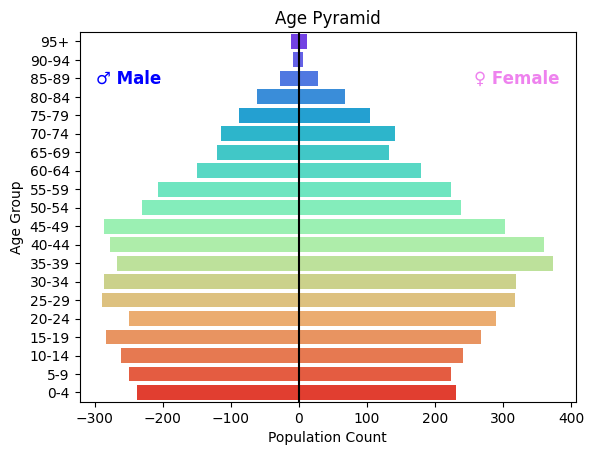

In [146]:
# Plotting the Age Pyramid

# Create a rainbow color palette
rainbowPalette = sns.color_palette("rainbow", n_colors=len(AgeClass))

agePyramidPlot = sns.barplot(x='Male', y='Age', data=agePos, order=AgeClass, palette=rainbowPalette, label='Male')
agePyramidPlot = sns.barplot(x='Female', y='Age', data=agePos, order=AgeClass, palette=rainbowPalette, label='Female')



# Add categorical labels on each side of the pyramid
plt.text(-250, len(AgeClass) // 9, '♂️ Male', ha='center', va='center', fontweight='bold', fontsize=12, color='blue')
plt.text(320, len(AgeClass) // 9, '♀️ Female', ha='center', va='center', fontweight='bold', fontsize=12, color='violet')




# Add a vertical line between male and female
plt.axvline(x=0, color='black', linestyle='-')
# agePyramid.legend()
plt.title('Age Pyramid')
agePyramidPlot.set(xlabel='Population Count', ylabel='Age Group')

***• Examine unemployment trends.***

Are certain ages more likely to be unemployed than others.

In [147]:
# Check related columns and inter relate them
relatedColumns = ['Age', 'Occupation', 'Gender']
employmentDataFrame = censusDataFrame[relatedColumns]
employmentDataFrame

,Age,Occupation,Gender
0,35,Ceramics designer,Female
1,73,"Retired Lecturer, further education",Female
2,39,"Nurse, adult",Female
3,56,Dentist,Male
4,45,"Designer, textile",Female
...,...,...,...
7753,21,University Student,Male
7754,19,Advertising account planner,Female
7755,40,Nutritional therapist,Female
7756,39,"Therapist, sports",Male


In [148]:
# Analyse The Unemployment Data
unemploymentDataFrame = employmentDataFrame[employmentDataFrame['Occupation'] == 'Unemployed']
unemploymentDataFrame

,Age,Occupation,Gender
33,29,Unemployed,Male
38,36,Unemployed,Female
75,74,Unemployed,Female
79,54,Unemployed,Female
106,44,Unemployed,Female
...,...,...,...
7656,41,Unemployed,Female
7711,29,Unemployed,Male
7717,42,Unemployed,Female
7726,39,Unemployed,Male


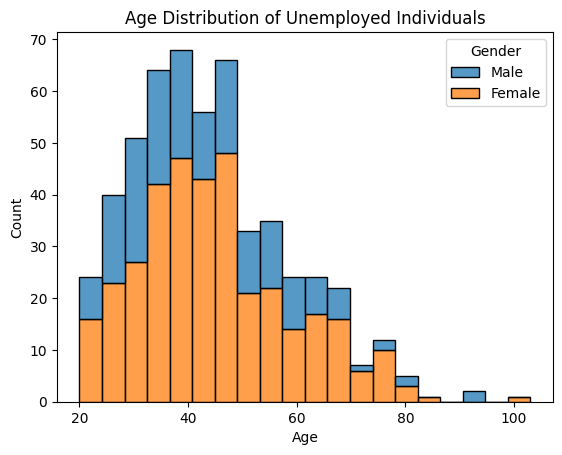

In [149]:
# Visualizing the Unemployment Trend
# Age distribution of unemployed individuals
ageUnemployedHistoPlot = sns.histplot(data=unemploymentDataFrame, x='Age', bins=20, edgecolor='black', hue='Gender', multiple='stack')
plt.title('Age Distribution of Unemployed Individuals')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [150]:
# Analyse The employment Data
fullyEmploymentDataFrame = employmentDataFrame[employmentDataFrame['Occupation'] != 'Unemployed']
fullyEmploymentDataFrame

,Age,Occupation,Gender
0,35,Ceramics designer,Female
1,73,"Retired Lecturer, further education",Female
2,39,"Nurse, adult",Female
3,56,Dentist,Male
4,45,"Designer, textile",Female
...,...,...,...
7753,21,University Student,Male
7754,19,Advertising account planner,Female
7755,40,Nutritional therapist,Female
7756,39,"Therapist, sports",Male


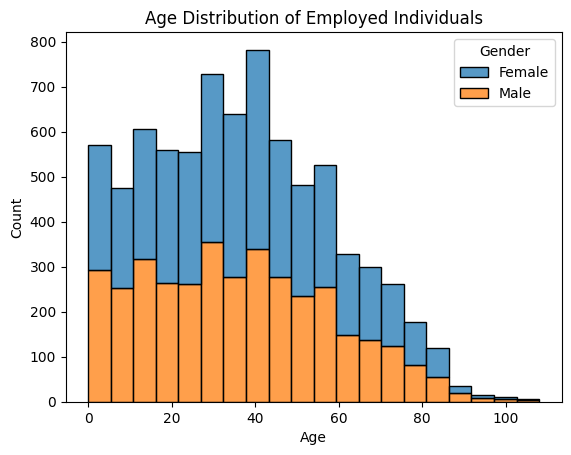

In [151]:
# Age distribution of Employed individuals
ageEmployedHistoPlot = sns.histplot(data=employmentDataFrame, x='Age', bins=20, edgecolor='black', hue='Gender', multiple='stack')
plt.title('Age Distribution of Employed Individuals')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

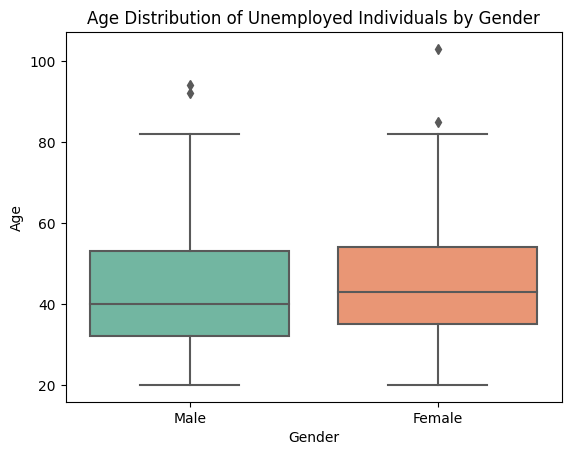

In [152]:
# Creating a box plot for age distribution
# plt.figure(figsize=(10, 6))
ageUnemployedGenderBoxPlot = sns.boxplot(x='Gender', y='Age', data=unemploymentDataFrame, palette='Set2')
plt.title('Age Distribution of Unemployed Individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


In [153]:
# Let's check for Maximum, Minimum, Median and Mean of the unemployed
print('Maximum age: ',unemploymentDataFrame['Age'].max() )
print('Minumum age : ', unemploymentDataFrame['Age'].min())
print('Mean age: ', unemploymentDataFrame['Age'].mean())
print('Median age: ', unemploymentDataFrame['Age'].median())

Maximum age:  103
Minumum age :  20
Mean age:  44.42429906542056
Median age:  42.0


In [154]:
# Let's check for Maximum, Minimum, Median and Mean Of The Population
print('Maximum age: ',censusDataFrame['Age'].max() )
print('Minumum age : ', censusDataFrame['Age'].min())
print('Mean age: ', censusDataFrame['Age'].mean())
print('Median age: ', censusDataFrame['Age'].median())

Maximum age:  108
Minumum age :  0
Mean age:  36.552461974735756
Median age:  36.0


***• Examine religious affiliations.***

Are any religions growing, or shrinking? 

Are there any newer religions that are increasing in numbers?

In [155]:
# Filter relevant columns
religionDataFrame = censusDataFrame['Religion']

# Count occurrences of each religious affiliation
religionCounts = religionDataFrame.value_counts()

In [156]:
religionDistribution = censusDataFrame.groupby('Religion').size().reset_index(name='Count')
religionDistribution

,Religion,Count
0,Agnostic,1
1,Bahai,1
2,Catholic,769
3,Christian,1834
4,Jewish,30
5,Methodist,547
6,Muslim,103
7,None,2608
8,Not Applicable,1757
9,Orthodoxy,1


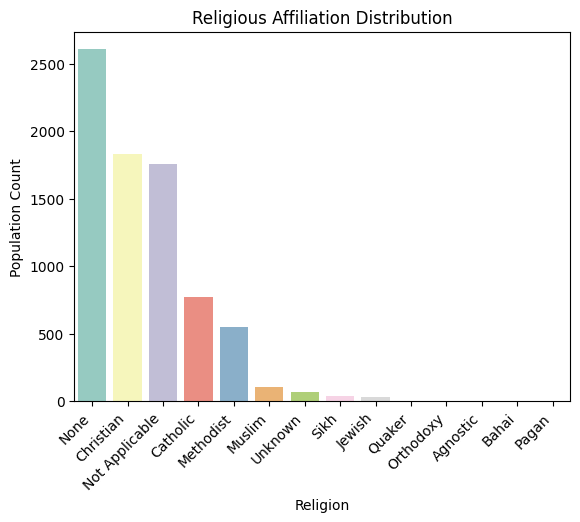

In [157]:
# Visualize Religious Affiliation
# plt.figure(figsize=(10, 6))
religionAgeBarPloy = sns.barplot(x=religionCounts.index, y=religionCounts.values, palette='Set3')
plt.title('Religious Affiliation Distribution')
plt.xlabel('Religion')
plt.ylabel('Population Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [158]:
religionDistributionPercentage = religionDistribution['Percentage'] = (religionDistribution['Count'] / religionDistribution['Count'].sum()) * 100
print(religionDistributionPercentage)


0      0.012890
1      0.012890
2      9.912349
3     23.640113
4      0.386698
5      7.050786
6      1.327662
7     33.616912
8     22.647590
9      0.012890
10     0.012890
11     0.051560
12     0.476927
13     0.837845
Name: Count, dtype: float64


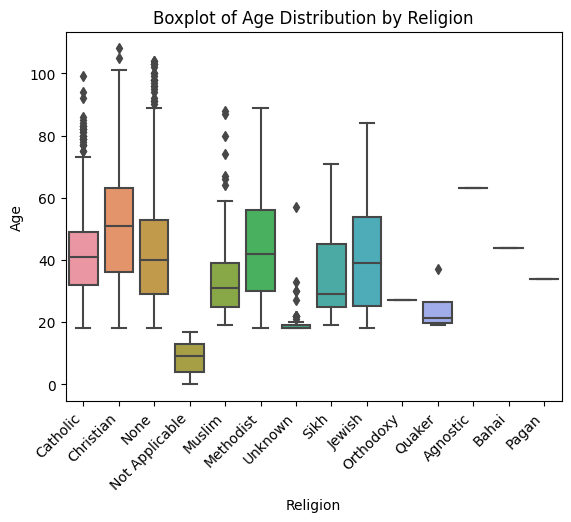

In [159]:
# Filter out rows where Age is not available
filtered_data = censusDataFrame.dropna(subset=['Age'])

# Create a boxplot using seaborn
ageReligionBoxPlot = sns.boxplot(x='Religion', y='Age', data=filtered_data)

# Add percentage annotations to each box
medians = filtered_data.groupby('Religion')['Age'].median().sort_values()
nobs = filtered_data['Religion'].value_counts().sort_index()

plt.title('Boxplot of Age Distribution by Religion')
plt.xlabel('Religion')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [160]:
# Filter out rows where Age is not available
filteredData = censusDataFrame.dropna(subset=['Age'])

# Calculate median age for each religion
medianAgePerReligion = filteredData.groupby('Religion')['Age'].median().sort_values()

# Display the list of median age per religion
print("Median Age per Religion:")
for religion, median_age in medianAgePerReligion.items():
    print(f"{religion}: {median_age}")


Median Age per Religion:
Not Applicable: 9.0
Unknown: 18.0
Quaker: 21.5
Orthodoxy: 27.0
Sikh: 29.0
Muslim: 31.0
Pagan: 34.0
Jewish: 39.0
None: 40.0
Catholic: 41.0
Methodist: 42.0
Bahai: 44.0
Christian: 51.0
Agnostic: 63.0


***• Examine the divorce and marriage rate.***

This might impact how you think about housing.

In [161]:
# Explore the unique values in the Marital Status column
maritalStatusCounts = censusDataFrame['Marital Status'].value_counts()

# Print the counts of each marital status
print("Marital Status Counts:")
print(maritalStatusCounts)

Marital Status Counts:
Single           2693
Married          2250
Never Married    1756
Divorced          703
Widowed           355
Unknown             1
Name: Marital Status, dtype: int64


In [162]:
# Calculate marriage and divorce rates
totalMarriages = maritalStatusCounts.get('Married', 0)
totalDivorces = maritalStatusCounts.get('Divorced', 0)
totalPeople = len(censusDataFrame)

marriageRate = (totalMarriages / totalPeople) * 100
divorceRate = (totalDivorces / totalPeople) * 100

# Print marriage and divorce rates
print("\nMarriage Rate: {:.2f}%".format(marriageRate))
print("Divorce Rate: {:.2f}%".format(divorceRate))


Marriage Rate: 29.00%
Divorce Rate: 9.06%


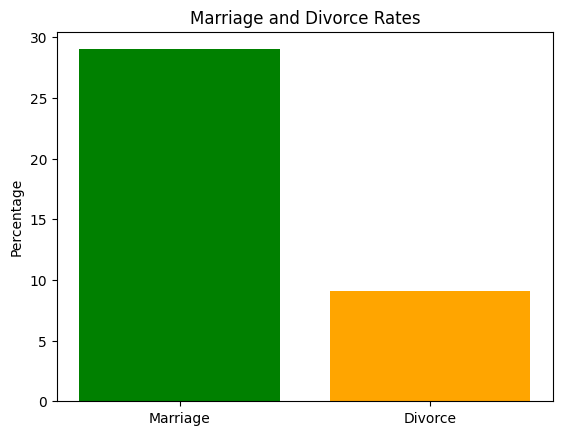

In [163]:
# Plotting the graph
labels = ['Marriage', 'Divorce']
values = [marriageRate, divorceRate]
fig, ax = plt.subplots()
marriageDivorceRates = ax.bar(labels, values, color=['green', 'orange'])
plt.title('Marriage and Divorce Rates')
plt.ylabel('Percentage')
plt.show()

In [164]:
# Check for relevant and related columns
relatedColumnDivorce = censusDataFrame[['Marital Status', 'Gender', 'Age']]
relatedColumnDivorce

,Marital Status,Gender,Age
0,Single,Female,35
1,Widowed,Female,73
2,Single,Female,39
3,Single,Male,56
4,Single,Female,45
...,...,...,...
7753,Single,Male,21
7754,Single,Female,19
7755,Single,Female,40
7756,Single,Male,39


In [165]:
# Filtering Marital Status by Age
maritalStatusAgeDF = censusDataFrame[['Marital Status', 'Age']]

# Filtering through rows based on Marital Status
marriedDivorcedDF = maritalStatusAgeDF[maritalStatusAgeDF['Marital Status'].isin(['Married', 'Divorced'])]


In [166]:
# Filtering rows for Married based on The Marital Status
marriedDataFrame = relatedColumnDivorce[relatedColumnDivorce['Marital Status'] == 'Married']
marriedDataFrame

,Marital Status,Gender,Age
11,Married,Female,46
12,Married,Male,49
14,Married,Female,49
15,Married,Male,49
18,Married,Female,40
...,...,...,...
7730,Married,Male,49
7735,Married,Female,36
7736,Married,Male,39
7740,Married,Male,52


In [167]:
# Filtering rows for Divorced based on The Marital Status
divorcedDataFrame = relatedColumnDivorce[relatedColumnDivorce['Marital Status'] == 'Divorced']
divorcedDataFrame

,Marital Status,Gender,Age
6,Divorced,Female,21
17,Divorced,Female,32
20,Divorced,Female,45
31,Divorced,Female,35
40,Divorced,Female,83
...,...,...,...
7701,Divorced,Male,21
7708,Divorced,Male,36
7710,Divorced,Female,32
7713,Divorced,Female,22


In [168]:
# Analysing Marriage and Divorce rates
marriageRate = marriedDataFrame['Gender'].value_counts(normalize=True) * 100
marriageRate

Female    50.266667
Male      49.733333
Name: Gender, dtype: float64

In [169]:
# Example: Divorce rate by Gender
divorceRate = divorcedDataFrame['Gender'].value_counts(normalize=True) * 100
divorceRate

Female    61.593172
Male      38.406828
Name: Gender, dtype: float64

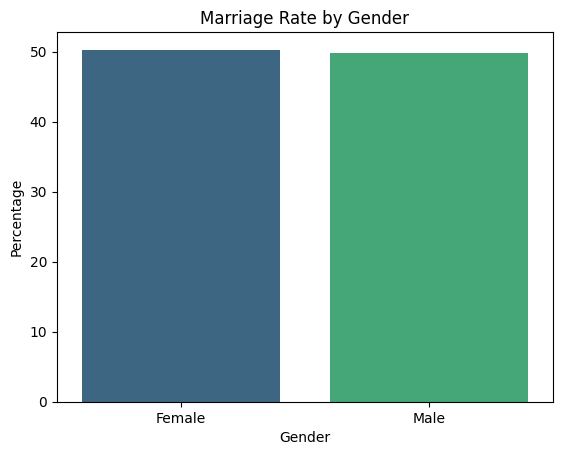

In [170]:
# Visualize Marriage Rate
marriageRateGender = sns.barplot(x=marriageRate.index, y=marriageRate.values, palette='viridis')
plt.title('Marriage Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

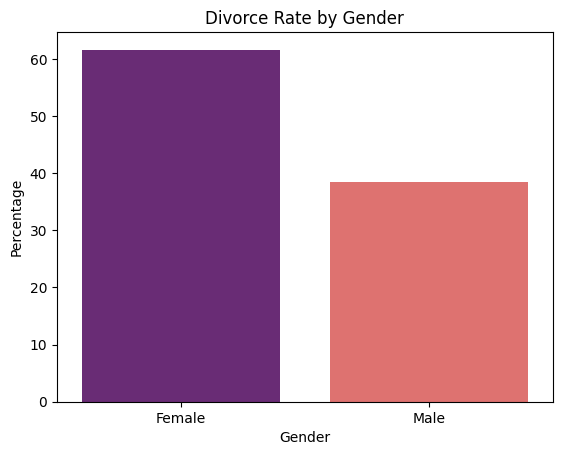

In [171]:
# Visualize Divorce Rate
divorceRateGender = sns.barplot(x=divorceRate.index, y=divorceRate.values, palette='magma')
plt.title('Divorce Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

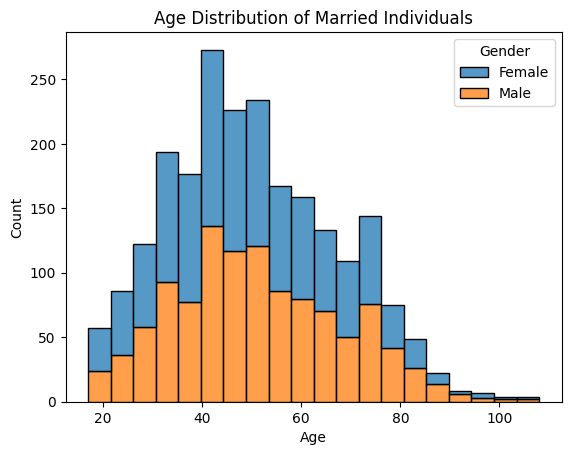

In [172]:
# Histogram for Married individuals
marriedAgeDistribution = sns.histplot(data=marriedDataFrame, x='Age', bins=20, edgecolor='black', hue='Gender', multiple='stack')
plt.title('Age Distribution of Married Individuals')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

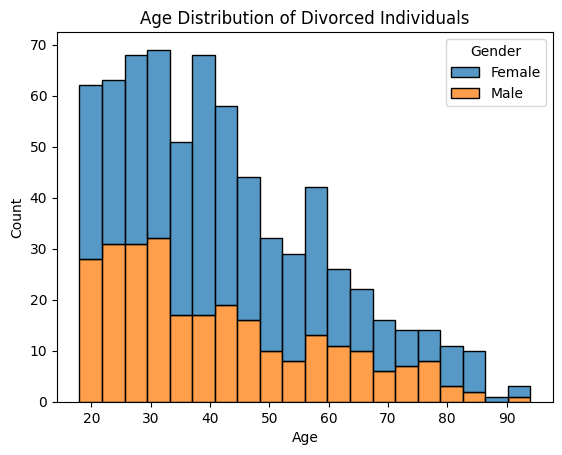

In [173]:
# Histogram for Divorced individuals
divorcedAgeDistribution = sns.histplot(data=divorcedDataFrame, x='Age', bins=20, edgecolor='black', hue='Gender', multiple='stack')
plt.title('Age Distribution of Divorced Individuals')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

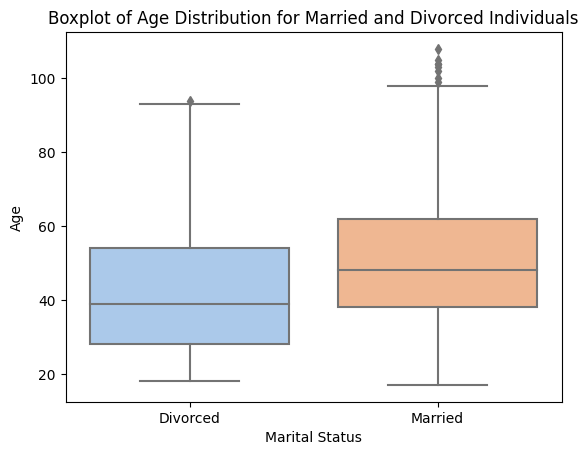

In [174]:
# Boxplot for Married and Divorced individuals
maritalStatusByAge = sns.boxplot(x='Marital Status', y='Age', data=marriedDivorcedDF, palette='pastel')
plt.title('Boxplot of Age Distribution for Married and Divorced Individuals')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.show()

***• Examine the occupancy level (how many people per house) and determine if existing housing is being under or over-used.***

In [175]:
# Grouping by House Number to calculate the number of people per house
occupancyLevelDataFrame = censusDataFrame.groupby(['House Number', 'Street'])['First Name'].count().reset_index()
occupancyLevelDataFrame.columns = ['House Number','Street', 'Occupancy']

In [176]:
occupancyLevelDataFrame.head(20)

,House Number,Street,Occupancy
0,1,Ahmed Ville,2
1,1,Albans Drive,1
2,1,Albion Tunnel,1
3,1,Appletree Plaza,2
4,1,August Vista,2
5,1,Baker Via,2
6,1,Bangor House,7
7,1,Bennett Plain,4
8,1,Black House,5
9,1,Bletchleybind Avenue,3


In [177]:
# Calculate the average occupancy level
averageOccupancy = occupancyLevelDataFrame['Occupancy'].mean()
averageOccupancy

2.5808383233532934

In [178]:
# Assess whether each house is underused, overused, or at an optimal level
occupancyLevel = occupancyLevelDataFrame['Occupancy Status'] = pd.cut(occupancyLevelDataFrame['Occupancy'], bins=[0, averageOccupancy-1, averageOccupancy+1, float('inf')],
                                labels=['Underused', 'Optimal', 'Overused'])
occupancyLevel.head(10)

0      Optimal
1    Underused
2    Underused
3      Optimal
4      Optimal
5      Optimal
6     Overused
7     Overused
8     Overused
9      Optimal
Name: Occupancy, dtype: category
Categories (3, object): ['Underused' < 'Optimal' < 'Overused']

In [179]:
occupancyLevelDataFrame.columns = ['House Number','Street', 'Occupancy','Occupancy Status']

In [180]:
occupancyLevelDataFrame.head(20)

,House Number,Street,Occupancy,Occupancy Status
0,1,Ahmed Ville,2,Optimal
1,1,Albans Drive,1,Underused
2,1,Albion Tunnel,1,Underused
3,1,Appletree Plaza,2,Optimal
4,1,August Vista,2,Optimal
5,1,Baker Via,2,Optimal
6,1,Bangor House,7,Overused
7,1,Bennett Plain,4,Overused
8,1,Black House,5,Overused
9,1,Bletchleybind Avenue,3,Optimal


In [181]:
medianOccupancy = occupancyLevelDataFrame.median()
medianOccupancy

House Number    21.0
Occupancy        2.0
dtype: float64

In [182]:
meanOccupancy = occupancyLevelDataFrame.mean()
meanOccupancy

House Number    37.379907
Occupancy        2.580838
dtype: float64

In [183]:
occupancySummary = occupancyLevelDataFrame.nunique()
print(occupancySummary)

House Number        237
Street              105
Occupancy            15
Occupancy Status      3
dtype: int64


In [184]:
# Merging the occupancy information back to the original DataFrame
censusDataFrame = pd.merge(censusDataFrame, occupancyLevelDataFrame, on=['House Number', 'Street'])


In [185]:
# Check value_counts() of occupancy level
occupancyLevelCheck = occupancyLevelDataFrame['Occupancy Status'].value_counts()
occupancyLevelCheck

Optimal      1397
Underused     854
Overused      755
Name: Occupancy Status, dtype: int64

In [186]:
censusDataFrame.head(5)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Occupancy,Occupancy Status
0,1,Northumberland Drive,Susan,Jackson,35,Head,Single,Female,Ceramics designer,None,Catholic,35-39,1,Underused
1,2,Northumberland Drive,Sara,Williams,73,Head,Widowed,Female,"Retired Lecturer, further education",None,Christian,70-74,1,Underused
2,3,Northumberland Drive,Aimee,Adams,39,Head,Single,Female,"Nurse, adult",None,None,35-39,1,Underused
3,4,Northumberland Drive,Henry,Allen,56,Head,Single,Male,Dentist,None,None,55-59,1,Underused
4,5,Northumberland Drive,Jasmine,Connolly,45,Head,Single,Female,"Designer, textile",None,Catholic,45-49,2,Optimal


In [187]:
# Calculate average occupancy and add a column for the difference from the average
averageOccupancy = censusDataFrame['Occupancy'].mean()
censusDataFrame['Occupancy Difference'] = censusDataFrame['Occupancy'] - averageOccupancy

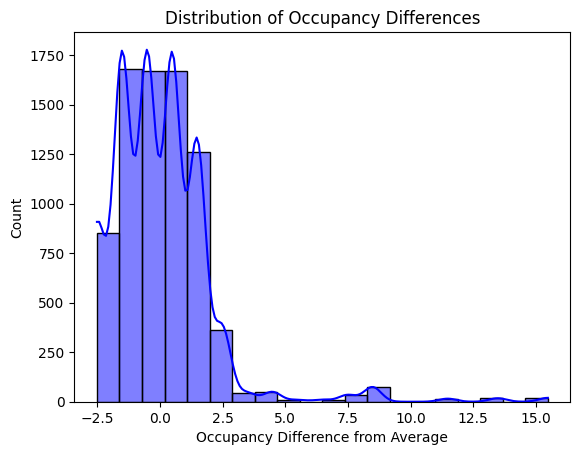

In [188]:
# Visualize the distribution of occupancy differences
occupancyDifferences = sns.histplot(censusDataFrame['Occupancy Difference'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Occupancy Differences')
plt.xlabel('Occupancy Difference from Average')
plt.ylabel('Count')
plt.show()

In [189]:
censusDataFrame.head(20)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Occupancy,Occupancy Status,Occupancy Difference
0,1,Northumberland Drive,Susan,Jackson,35,Head,Single,Female,Ceramics designer,None,Catholic,35-39,1,Underused,-2.521526
1,2,Northumberland Drive,Sara,Williams,73,Head,Widowed,Female,"Retired Lecturer, further education",None,Christian,70-74,1,Underused,-2.521526
2,3,Northumberland Drive,Aimee,Adams,39,Head,Single,Female,"Nurse, adult",None,None,35-39,1,Underused,-2.521526
3,4,Northumberland Drive,Henry,Allen,56,Head,Single,Male,Dentist,None,None,55-59,1,Underused,-2.521526
4,5,Northumberland Drive,Jasmine,Connolly,45,Head,Single,Female,"Designer, textile",None,Catholic,45-49,2,Optimal,-1.521526
5,5,Northumberland Drive,Aaron,Connolly,13,Son,Never Married,Male,Student,None,Not Applicable,10-14,2,Optimal,-1.521526
6,6,Northumberland Drive,Stephanie,Clark,21,Head,Divorced,Female,Speech and language therapist,None,None,20-24,1,Underused,-2.521526
7,7,Northumberland Drive,Charlene,Greenwood,48,Head,Single,Female,Museum/gallery exhibitions officer,None,Christian,45-49,2,Optimal,-1.521526
8,7,Northumberland Drive,Patrick,Nolan,49,Partner,Single,Male,"Journalist, broadcasting",None,Christian,45-49,2,Optimal,-1.521526
9,8,Northumberland Drive,Benjamin,Ferguson,89,Head,Widowed,Male,Retired Chemical engineer,None,Christian,85-89,1,Underused,-2.521526


***• Examine the number of university students. All of these are commuters since there are no universities in the town. Are there any other professions that are likely to be commuters?***

In [190]:
# Check for the number of university students based on occupation
universityStudents = censusDataFrame[censusDataFrame['Occupation'] == 'University Student']

# Count the number of university students
countuniversityStudents = len(universityStudents)

print(f'Total number of university students: {countuniversityStudents}')


Total number of university students: 443


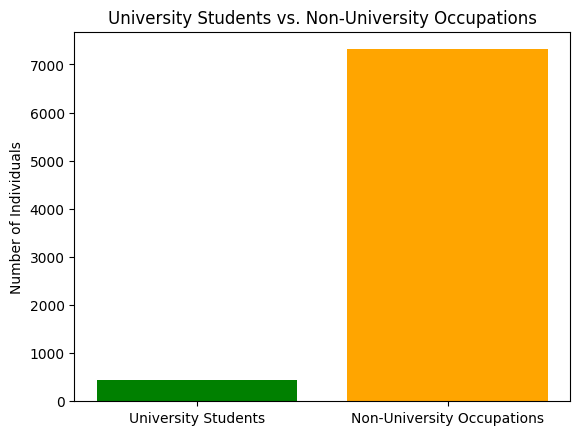

Total number of university students: 443


In [191]:
# Plotting the graph University Student Non-University Student
fig, ax = plt.subplots()
universityStudentNonUni = ax.bar(['University Students', 'Non-University Occupations'], [countuniversityStudents, len(censusDataFrame) - countuniversityStudents], color=[ 'green', 'orange'])
plt.title('University Students vs. Non-University Occupations')
plt.ylabel('Number of Individuals')
plt.show()

# Print the total number of university students
print(f'Total number of university students: {countuniversityStudents}')

In [192]:
# Identifying other professions that are likely to be commuters
likelyCommuterProfessions = censusDataFrame[censusDataFrame['Occupation'].isin([
     'Associate Professor', 'Further education lecturer', 
    'Higher education lecturer', 'Contractor', 'Merchant navy officer',  
    'Naval architect', 'Ship broker', 'Diplomatic Services operational officer', 
    'Travel agency manager', 'Contracting civil engineer', 'Passenger transport manager', 
    'Transport planner', 'Medical sales representative'
])]
likelyCommuterProfessions
# Count the other likely Commuter Professions
otherlikelyCommuterProfessions = len(likelyCommuterProfessions)

print(f'Total number of likely commuters: {otherlikelyCommuterProfessions}')

Total number of likely commuters: 120


We have **120** other likely commuters with the **443** University students total commuters is **563**.

We will be checking for total commuuters below and plot a graph for it

In [193]:
# Identifying other professions that are likely to be commuters
allCommuters = censusDataFrame[censusDataFrame['Occupation'].isin([
     'Associate Professor','University Student', 'Further education lecturer', 
    'Higher education lecturer', 'Contractor', 'Merchant navy officer',  
    'Naval architect', 'Ship broker', 'Diplomatic Services operational officer', 
    'Travel agency manager', 'Contracting civil engineer', 'Passenger transport manager', 
    'Transport planner', 'Medical sales representative'
])]
allCommuters
# Count the other likely Commuter Professions
countAllCommuters = len(allCommuters)

print(f'Total number of all commuters: {countAllCommuters}')

Total number of all commuters: 563


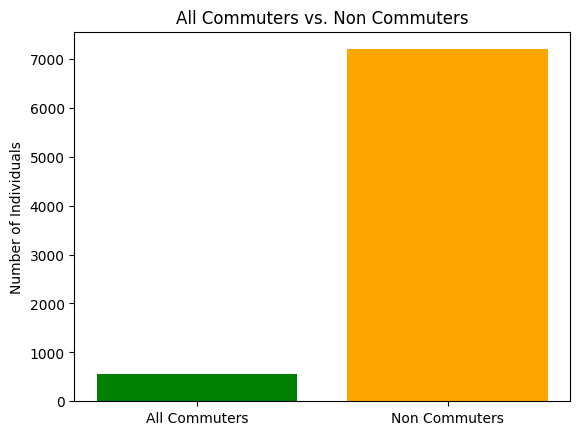

Total number of university students: 563


In [194]:
# Plotting the graph
fig, ax = plt.subplots()
allCommutersPlot = ax.bar(['All Commuters', 'Non Commuters'], [countAllCommuters, len(censusDataFrame) - countAllCommuters], color=['green', 'orange'])
plt.title('All Commuters vs. Non Commuters')
plt.ylabel('Number of Individuals')
plt.show()

# Print the total number of university students
print(f'Total number of university students: {countAllCommuters}')

In [195]:
# Identifying other professions that are likely to be commuters
likelyCommuterProfessions = censusDataFrame[censusDataFrame['Occupation'].isin(['Commute Specialist', 'Sales Representative', 'Consultant', 'Commute', 'Driver', 'Transport', 'Truck', 'Courier', 'Delivery',  'Associate Professor' ])]
likelyCommuterProfessions

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Occupancy,Occupancy Status,Occupancy Difference
914,28,Glasgow Spurs,Francis,Lawson,55,Head,Married,Male,Associate Professor,None,Christian,55-59,2,Optimal,-1.521526
2917,35,Cougar Branch,Alice,Robson,28,Partner,Single,Female,Associate Professor,None,Catholic,25-29,2,Optimal,-1.521526
3994,115,St.Mary Field,Brett,Stokes,25,Son,Single,Male,Associate Professor,None,None,25-29,5,Overused,1.478474


In [196]:
# Calculate the percentage of commuters
percentageOfCommuters = (countAllCommuters / len(censusDataFrame)) * 100

# Print the percentage of commuters
print(f'Percentage of commuters in the population: {percentageOfCommuters:.2f}%')

Percentage of commuters in the population: 7.26%


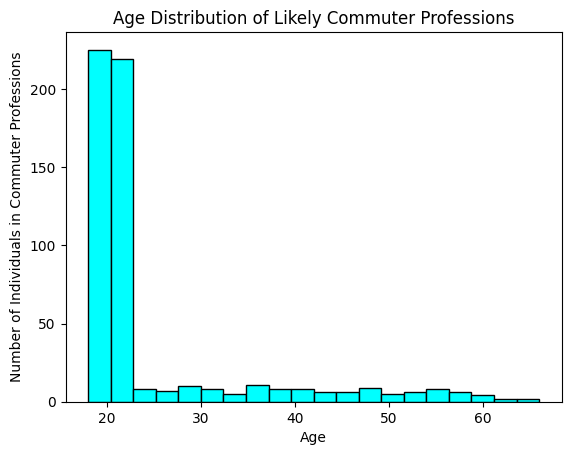

In [197]:
# Example: Age distribution of likely commuter professions
fig, ax = plt.subplots()
commutersAgeDistrHistogram = ax.hist(allCommuters['Age'], bins=20, color='cyan', edgecolor='black')
plt.title('Age Distribution of Likely Commuter Professions')
plt.xlabel('Age')
plt.ylabel('Number of Individuals in Commuter Professions')
plt.show()


***• What is the birth rate and death rate for the town?***

##### Birth Rate

In [198]:
# Checking Fo The Birth Rate Using Ages 0 
agedZero = (censusDataFrame['Age'] == 0).sum()
bearingAge = ((censusDataFrame['Age'] >= 18)&(censusDataFrame['Age'] <= 55)).sum()
print('Bearing Age Total: ',bearingAge)
print('Total Number of Infants: ', agedZero)

Bearing Age Total:  4410
Total Number of Infants:  99


In [199]:
birthRate = round((agedZero/bearingAge)*100000)
print('The Birth Rate is',birthRate)

The Birth Rate is 2245


###### Death Rate

In [200]:
# Age Range (0-4) and (5-9)
ageRange9 = []
ageRange10 = []
for i in censusDataFrame['Age']:
    if i >= 0 and i <= 4:
        ageRange9.append(i)
    elif i >= 5 and i <= 9:
        ageRange10.append(i)
deathNumberFive = len(ageRange9) - len(ageRange10)
deathPerAnnumFive = deathNumberFive/5
print('Death per annum is  ',deathPerAnnumFive)
deathPerThousandFive = (deathPerAnnumFive/len(ageRange10))*100000
print('Death per 100000 is  ',deathPerThousandFive)
# Negative because there was a relative increase in this age group

Death per annum is   -1.2
Death per 100000 is   -253.6997885835095


In [201]:
# Age Range (10-14) and (15-19)
ageRange11 = []
ageRange12 = []
for i in censusDataFrame['Age']:
    if i >= 10 and i <=14:
        ageRange11.append(i)
    elif i >= 15 and i <= 19:
        ageRange12.append(i)
deathNumberSix = len(ageRange11) - len(ageRange12)
deathPerAnnumSix = deathNumberSix/5
print('The death rate per annum is :',deathPerAnnumSix)
deathPerThousandSix = (deathPerAnnumSix/len(ageRange12))*100000
print('Death per 100000 is : ',deathPerThousandSix)

The death rate per annum is : -9.6
Death per 100000 is :  -1745.4545454545455


In [202]:
# Age Range (20-24) and (25-29)
ageRange13 = []
ageRange14 = []
for i in censusDataFrame['Age']:
    if i >= 20 and i <=24:
        ageRange13.append(i)
    elif i >= 25 and i <= 29:
        ageRange14.append(i)
deathNumberSeven = len(ageRange13) - len(ageRange14)
deathPerAnnumSeven = deathNumberSeven/5
print('Death rate per annum is ',deathPerAnnumSeven)
deathPerThousandSeven = (deathPerAnnumSeven/len(ageRange14))*100000
print('Death per 100000 is ',deathPerThousandSeven)


Death rate per annum is  -13.4
Death per 100000 is  -2211.2211221122116


In [203]:
# Age Range (30-34) and (35-39)
ageRange15 = []
ageRange16 = []
for i in censusDataFrame['Age']:
    if i >= 30 and i <=34:
        ageRange15.append(i)
    elif i >= 35 and i <= 39:
        ageRange16.append(i)
deathNumberEight = len(ageRange15) - len(ageRange16)
deathPerAnnumEight = deathNumberEight/5
print('Death rate per annum ',deathPerAnnumEight)
deathPerThousandEight = (deathPerAnnumEight/len(ageRange16))*100000
print('Death per 100000 is : ',deathPerThousandEight)


Death rate per annum  -7.0
Death per 100000 is :  -1093.75


In [204]:
# Age Range (40-44) and (45-49)
ageRange17 = []
ageRange18 = []
for i in censusDataFrame['Age']:
    if i >= 40 and i <=44:
        ageRange17.append(i)
    elif i >= 45 and i <= 49:
        ageRange18.append(i)
deathNumberNine = len(ageRange17) - len(ageRange18)
deathPerAnnumNine = deathNumberNine/5
print('Death rate per annum is : ',deathPerAnnumNine)
deathPerThousandNine = (deathPerAnnumNine/len(ageRange18))*100000
print('Death per 100000 is : ',deathPerThousandNine)



Death rate per annum is :  9.8
Death per 100000 is :  1666.6666666666667


In [205]:
# Age Range (50-54) and (55-59)
ageRange19 = []
ageRange20 = []
for i in censusDataFrame['Age']:
    if i >= 50 and i <=54:
        ageRange19.append(i)
    elif i >= 55 and i <= 59:
        ageRange20.append(i)
deathNumberTen = len(ageRange19) - len(ageRange20)
deathPerAnnumTen = deathNumberTen/5
print('Death rate per annum is : ',deathPerAnnumTen)
deathPerThousandTen = (deathPerAnnumTen/len(ageRange20))*100000
print('Death per 100000 is : ',deathPerThousandTen)

Death rate per annum is :  7.8
Death per 100000 is :  1813.9534883720928


In [206]:
# Age Range (56-60) and (61-65)
ageRange1 = []
ageRange2 = []
for i in censusDataFrame['Age']:
    if i >= 56 and i <= 60:
        ageRange1.append(i)
    elif i >= 61 and i <= 65:
        ageRange2.append(i)
deathNumber = len(ageRange1) - len(ageRange2)
deathPerAnnum = deathNumber/5
print('Death per Annum: ',deathPerAnnum)

deathPerThousand = (deathPerAnnum/len(ageRange2))*100000
print('Death per 100,000 is: ',deathPerThousand)

Death per Annum:  25.8
Death per 100,000 is:  8805.460750853243


In [207]:
# Age Range (60-64) and (65-69)
ageRange21 = []
ageRange22 = []
for i in censusDataFrame['Age']:
    if i >= 60 and i <=64:
        ageRange21.append(i)
    elif i >= 65 and i <= 69:
        ageRange22.append(i)
deathNumberElevn = len(ageRange21) - len(ageRange22)
deathPerAnnumElevn = deathNumberElevn/5
print('Death rate per annum is : ',deathPerAnnumElevn)
deathPerThousandElevn = (deathPerAnnumElevn/len(ageRange22))*100000
print('Death per 100000 is : ',deathPerThousandElevn)

Death rate per annum is :  15.0
Death per 100000 is :  5928.853754940711


In [208]:
# Age Range (71-75) and (66-70)
ageRange3 = []
ageRange4 = []
for i in censusDataFrame['Age']:
    if i >= 66 and i <= 70:
        ageRange3.append(i)
    elif i >= 71 and i <= 75:
        ageRange4.append(i)
deathNumberTwo = len(ageRange3) - len(ageRange4)
deathNumberTwo
deathPerAnnumTwo = deathNumberTwo/5
print('Death per annum: ',deathPerAnnumTwo)
deathPerThousandTwo = (deathPerAnnumTwo/len(ageRange3))*100000
print('Death per 100,000: ',deathPerThousandTwo)

Death per annum:  -2.2
Death per 100,000:  -876.4940239043825


In [209]:
# Age Range (76-80) and (81-85)
ageRange5 = []
ageRange6 = []
for i in censusDataFrame['Age']:
    if i >= 76 and i <= 80:
        ageRange5.append(i)
    elif i >= 81 and i <= 85:
        ageRange6.append(i)
deathNumberThree = len(ageRange5) - len(ageRange6)
deathNumberThree
deathPerAnnumThree = deathNumberThree/5
print('Death per annum is : ',deathPerAnnumThree)
deathPerThousandThree = (deathPerAnnumThree/len(ageRange6))*100000
print('Death per 100000 is : ',deathPerThousandThree)

Death per annum is :  14.4
Death per 100000 is :  13846.153846153848


In [210]:
# Age Range (86-90) and (91 and above)

ageRange7 = []
ageRange8 = []
for i in censusDataFrame['Age']:
    if i >= 86 and i <=90:
        ageRange7.append(i)
    elif i > 90:
        ageRange8.append(i)
deathNumberFour = len(ageRange7) - len(ageRange8)
deathPerAnnumFour = deathNumberFour/5
print('Death per annum is :',deathPerAnnumFour)
deathPerThousandFour = (deathPerAnnumFour/len(ageRange8))*100000
print('Death per 100000 is : ',deathPerThousandFour)


Death per annum is : 2.2
Death per 100000 is :  6111.111111111111


In [211]:
# What is the total death rate (i.e. number of deaths per 100,000) across all age groups
totalDeathRate = (-1.2) + (-9.6) + (-13.4) + (-7.0) + 9.8 + 7.8 + 25.8 + 15.0 + (-2.0) + 14.4 + 2.2
totalDeathThousand = (totalDeathRate/10610)*100000
print('The Total Death Rate is ', totalDeathThousand)



The Total Death Rate is  393.96795475966076


In [212]:
# Let's check if we longer have any missing values in our dataframe
censusDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7758 entries, 0 to 7757
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   7758 non-null   int64   
 1   Street                         7758 non-null   object  
 2   First Name                     7758 non-null   object  
 3   Surname                        7758 non-null   object  
 4   Age                            7758 non-null   int32   
 5   Relationship to Head of House  7758 non-null   object  
 6   Marital Status                 7758 non-null   object  
 7   Gender                         7758 non-null   object  
 8   Occupation                     7758 non-null   object  
 9   Infirmity                      7758 non-null   object  
 10  Religion                       7758 non-null   object  
 11  Age Group                      7758 non-null   object  
 12  Occupancy                      775

**Saving The Clean DataSet To New CSV**

## I NEED TO CREATE BOTH CLEAN AND UPDATED CSV FILEs

In [213]:
censusDataFrame

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Occupancy,Occupancy Status,Occupancy Difference
0,1,Northumberland Drive,Susan,Jackson,35,Head,Single,Female,Ceramics designer,None,Catholic,35-39,1,Underused,-2.521526
1,2,Northumberland Drive,Sara,Williams,73,Head,Widowed,Female,"Retired Lecturer, further education",None,Christian,70-74,1,Underused,-2.521526
2,3,Northumberland Drive,Aimee,Adams,39,Head,Single,Female,"Nurse, adult",None,None,35-39,1,Underused,-2.521526
3,4,Northumberland Drive,Henry,Allen,56,Head,Single,Male,Dentist,None,None,55-59,1,Underused,-2.521526
4,5,Northumberland Drive,Jasmine,Connolly,45,Head,Single,Female,"Designer, textile",None,Catholic,45-49,2,Optimal,-1.521526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7753,1,Westminster Citadel,Justin,Patel,21,None,Single,Male,University Student,None,None,20-24,8,Overused,4.478474
7754,1,Westminster Citadel,Karen,Brooks,19,None,Single,Female,Advertising account planner,None,None,15-19,8,Overused,4.478474
7755,1,Westminster Citadel,Kirsty,King,40,None,Single,Female,Nutritional therapist,None,None,40-44,8,Overused,4.478474
7756,1,Westminster Citadel,Raymond,Lee,39,None,Single,Male,"Therapist, sports",None,Methodist,35-39,8,Overused,4.478474


In [214]:
# All pictures of plot will be generated and save to computer
try:
    agePyramidPlot.get_figure().savefig('./agePyramidPlot.png')
    ageUnemployedHistoPlot.get_figure().savefig('./ageUnemployedHistoPlot.png')
    ageEmployedHistoPlot.get_figure().savefig('./ageEmployedHistoPlot.png')
    ageUnemployedGenderBoxPlot.get_figure().savefig('./ageUnemployedGenderBoxPlot.png')
    religionAgeBarPloy.get_figure().savefig('./religionAgeBarPloy.png')
    marriageRateGender.get_figure().savefig('./marriageRateGender.png')
    divorceRateGender.get_figure().savefig('./divorceRateGender.png')
    marriedAgeDistribution.get_figure().savefig('./marriedAgeDistribution.png')
    divorcedAgeDistribution.get_figure().savefig('./divorcedAgeDistribution.png')
    maritalStatusByAge.get_figure().savefig('./maritalStatusByAge.png')    
    occupancyDifferences.get_figure().savefig('./occupancyDifferences.png')
    
    
    fig.savefig('./commutersAgeDistrHistogram.png')
    fig.savefig('./universityStudentNonUni.png')
    fig.savefig('./marriageDivorceRates.png')
    fig.savefig('./allCommutersPlot.png')   
    print('All plots file have been saved as .png image successfully to computer')  # If successful Print when successful 
except Exception as error:                        # Checking for errors
    print('Unsuccesful, failed to save ')       # Then Print when successful 
    print(type(error))


All plots file have been saved as .png image successfully to computer


In [215]:
try: 
    updatedCensusDataFrame = censusDataFrame
    output_csv_file_path = 'census17_updated.csv'
    # Save the updated DataFrame to a new CSV file
    updatedCensusDataFrame.to_csv(output_csv_file_path, index=False)
    print('Updated CSV file successfully created and saved to computer')  # If successful Print when successful 
except Exception as error:                        # Checking for errors
    print('Unsuccesful, failed to save ')       # Then Print when successful 
    print(type(error))

Updated CSV file successfully created and saved to computer
